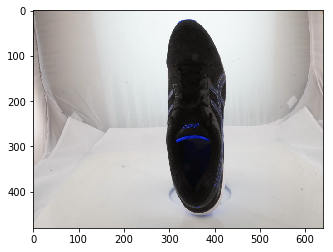

(480, 640, 3)


In [832]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'Challenges/Flipkart Challenge/test/1/11.png'
#img_path = "bottle_data/test/bottle_81.jpg"
#img_path = "a.jpg"

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(bgr_img, cmap='gray')
plt.show()

print(bgr_img.shape)

In [833]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
#filter_vals = np.array([[-3, -3, 3, 3], [-3, -3, 3, 3], [-3, -3, 3, 3], [-3, -3, 3, 3]])

filter_vals = np.array([[-6, 0, 6], [-8, 0, 8], [-6, 0, 6]])


print('Filter shape: ', filter_vals.shape)

Filter shape:  (3, 3)


In [822]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-6  0  6]
 [-8  0  8]
 [-6  0  6]]


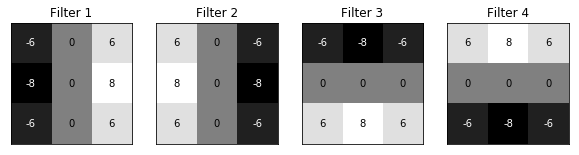

In [823]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [824]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), bias=False)
)


In [825]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    l = []
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        #ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        #ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        #ax.set_title('Output %s' % str(i+1))
        l.append(layer[0,i].data.numpy())
        
    return l

[array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.02352953,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.07843137,
         -0.16470587, -0.18823528],
        [ 0.        ,  0.        ,  0.        , ..., -0.02352929,
         -0.12548983, -0.15686285],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.07843173, -0.10196078]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02352953, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.07843

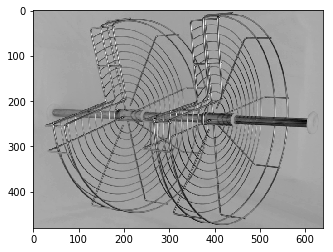

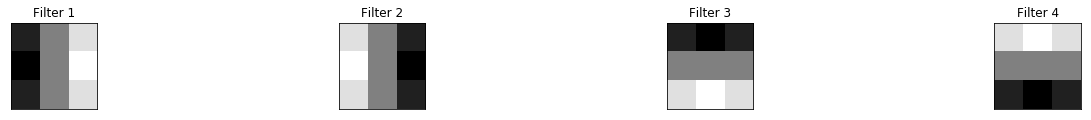

<Figure size 1440x1440 with 0 Axes>

In [826]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

In [827]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02352953, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.07843137, 0.16470587,
         0.18823528],
        [0.        , 0.        , 0.        , ..., 0.02352929, 0.12548983,
         0.15686285],
        [0.        , 0.        , 0.        , ..., 0.        , 0.07843173,
         0.10196078]], dtype=float32),
 array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.00000

<Figure size 1440x1440 with 0 Axes>

(478, 638)


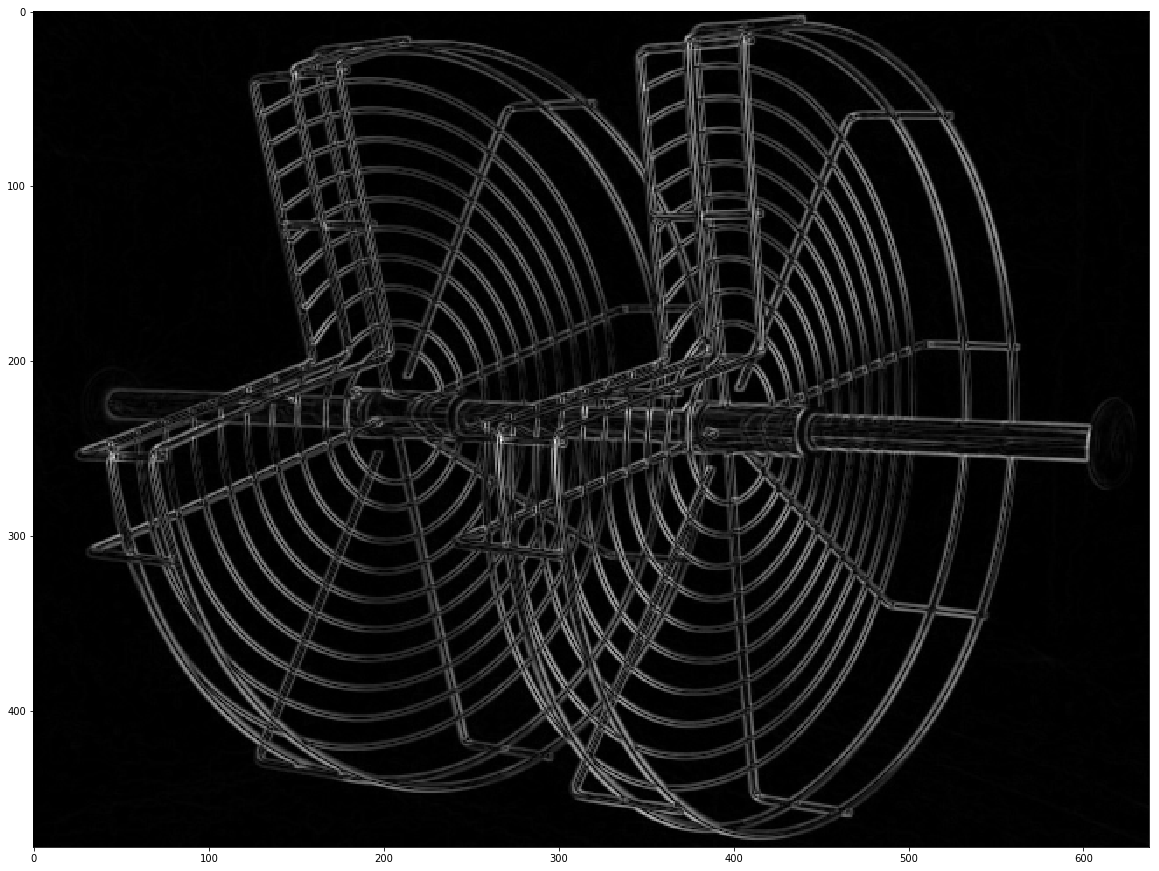

In [828]:
l = viz_layer(activated_layer)
left = l[0]
top = l[2]
right = l[1]
bottom = l[3]
#plt.imshow(left)
x = np.add(left,top)
y = np.add(x,right)
z = np.add(y,bottom)

w = np.divide(z, 4)

#median = cv2.medianBlur(w,5)
#blur = cv2.bilateralFilter(w,9,75,75)
#blur = cv2.GaussianBlur(w,(5,5),0)
'''
for i in range(478):
    for j in range(638):
        z[i][j] /= 10.635294
'''
plt.imshow(z, cmap="gray")
print(z.shape)
plt.imsave('1.png', w, cmap='gray', format='png')

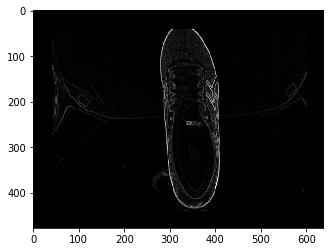

In [763]:
temp = np.ones(shape=(478,638))
for j in range(638):
    for i in range(478):
        if i <= 40 or i >= 440:
            temp[i][j] = 0
            
for i in range(478):
    for j in range(638):
        if j <= 40 or j >= 600:
            temp[i][j] = 0
                
foo = np.multiply(w,temp)
plt.imshow(foo, cmap="gray")

In [576]:
num_grid = 16
num_cols = 40 # 640/16
num_rows = 30 # 480/16
second_list = []
grid = []
for row in range(478):
    first_list = []
    first_sum = 0
    for col in range(638):
        first_sum += z[row][col]
        if (col+1) % num_cols == 0:
            first_list.append(first_sum)
            first_sum = 0
        if col == 637:
            first_list.append(first_sum)
            first_sum = 0
    second_list.append(first_list)

    if (row+1) % num_rows == 0:
        ls = []
        for j in range(16):
            total_sum = 0
            for i in range(num_rows):
                total_sum += second_list[i][j]
            ls.append(total_sum)
        grid.append(ls)
        second_list = []
    if row == 477:
        for j in range(16):
            total_sum = 0
            for i in range(num_rows-2):
                total_sum += second_list[i][j]
            ls.append(total_sum)
        grid.append(ls)
        second_list = []

for i in range(num_grid):
    for j in range(num_grid):
        grid[i][j] *= 255

foo1 = grid[14][:16]
foo2 = grid[14][16:]

final_grid = []
for i in range(14):
    final_grid.append(grid[i])
final_grid.append(foo1)
final_grid.append(foo2)
print(final_grid[15])

[7.151954025413374, 7.150479356224849, 7.597372270986845, 8.91004859659406, 11.68142288038407, 10.553108744556248, 10.390868525492749, 10.89971007080753, 10.094420514458946, 7.15489467866, 7.559029843874711, 7.640148083172633, 7.047240893113411, 7.800922241702615, 8.123917430649549, 7.682913891536522]


In [581]:
num_grid = 32
num_cols = 20 # 640/16
num_rows = 15 # 480/16
second_list = []
grid = []
for row in range(478):
    first_list = []
    first_sum = 0
    for col in range(638):
        first_sum += z[row][col]
        if (col+1) % num_cols == 0:
            first_list.append(first_sum)
            first_sum = 0
        if col == 637:
            first_list.append(first_sum)
            first_sum = 0
    second_list.append(first_list)

    if (row+1) % num_rows == 0:
        ls = []
        for j in range(32):
            total_sum = 0
            for i in range(num_rows):
                total_sum += second_list[i][j]
            ls.append(total_sum)
        grid.append(ls)
        second_list = []
    if row == 477:
        for j in range(32):
            total_sum = 0
            for i in range(num_rows-2):
                total_sum += second_list[i][j]
            ls.append(total_sum)
        grid.append(ls)
        second_list = []

for i in range(num_grid):
    for j in range(num_grid):
        grid[i][j] *= 255
        
foo1 = grid[30][:32]
foo2 = grid[30][32:]

final_grid = []
for i in range(30):
    final_grid.append(grid[i])
final_grid.append(foo1)
final_grid.append(foo2)

for i in final_grid:
    print(max(i))

459.6020554412548
365.20123630074363
397.54526305948514
379.11571667403217
375.73343850239945
378.7406067424349
405.06889074397225
470.5103762480416
403.9383766422084
383.25474847095506
429.13841560138906
441.1728452001173
13724.871878696216
31691.837626299308
20059.2479900911
14924.647034028894
20337.567336943466
13801.96999359643
21260.907870333045
21078.12076033093
29476.19520867127
25991.196498563513
2845.9965072879645
1403.628818201826
1338.939478923917
1108.3856777835338
1340.0666048724554
1049.7137899450138
1271.615203055319
794.3383730600505
222504.96517539228
3.8702068003038903


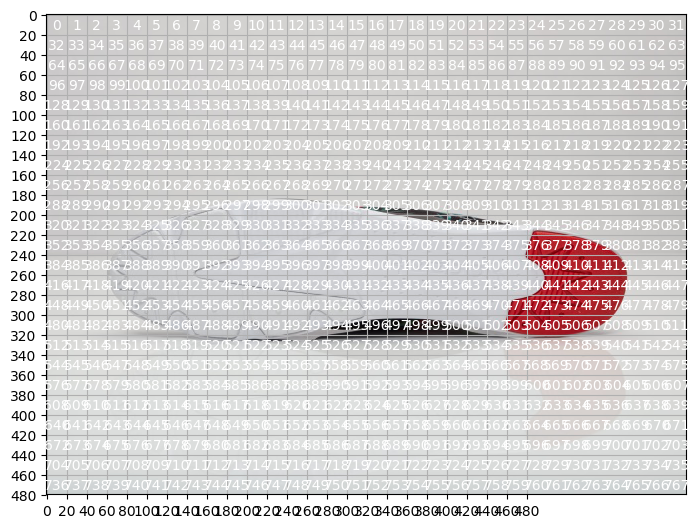

In [580]:
import matplotlib.ticker as plticker

image = Image.open('Challenges/Flipkart Challenge/train/0/4904.png')
my_dpi=100.

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=20.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

# Save the figure
#fig.savefig('myImageGrid.tiff',dpi=my_dpi)

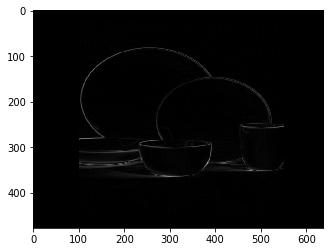

In [387]:
l = np.zeros(shape=(478, 638))
for i in range(478):
    for j in range(100,550):
        l[i][j] = 1

m = np.zeros(shape=(478, 638))
for i in range(638):
    for j in range(25, 450):
        m[j][i] = 1

w = np.multiply(z,l)
w = np.multiply(w,m)
plt.imshow(w, cmap="gray")

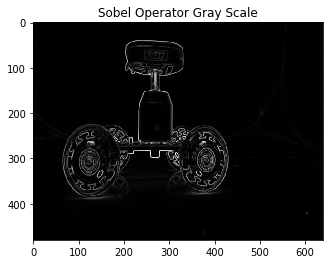

In [591]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open(img_path)).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('Sobel Operator Gray Scale')
plt.imsave('dancing-spider-sobel.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

(1152, 648)


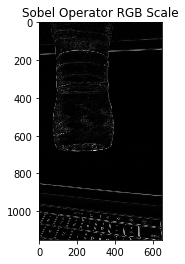

In [188]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open(img_path)).astype(np.uint8)

# Sobel Operator
h, w, d = img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w, d))

# offset by 1
for channel in range(d):
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) + \
                             (horizontal[1, 2] * img[i, j + 1, channel]) + \
                             (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                             (horizontal[2, 1] * img[i + 1, j, channel]) + \
                             (horizontal[2, 2] * img[i + 1, j + 1, channel])

            verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                           (vertical[0, 1] * img[i - 1, j, channel]) + \
                           (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                           (vertical[1, 0] * img[i, j - 1, channel]) + \
                           (vertical[1, 1] * img[i, j, channel]) + \
                           (vertical[1, 2] * img[i, j + 1, channel]) + \
                           (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                           (vertical[2, 1] * img[i + 1, j, channel]) + \
                           (vertical[2, 2] * img[i + 1, j + 1, channel])

            # Edge Magnitude
            mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
            # Avoid underflow: clip result
            newgradientImage[i - 1, j - 1, channel] = mag

# now add the images r g and b
rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]
print(rgb_edge.shape)
plt.figure()
plt.title('Sobel Operator RGB Scale')
plt.imsave('sobel.png', rgb_edge, cmap='gray', format='png')
plt.imshow(rgb_edge, cmap='gray')
plt.show()

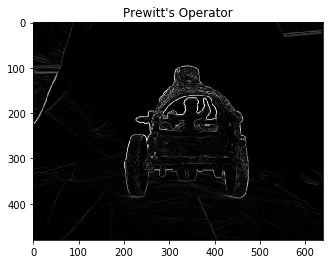

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open(img_path)).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.title("Prewitt's Operator")
#plt.imsave('dancing-spider-prewitt.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

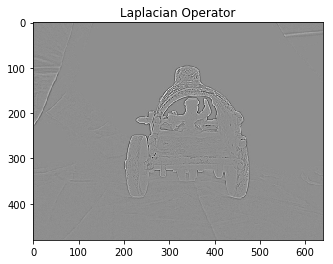

In [15]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread(img_path)

# Apply gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure()
plt.title('Laplacian Operator')
#plt.imsave('shapes-lap.png', laplacian, cmap='gray', format='png')
plt.imshow(laplacian, cmap='gray')
plt.show()

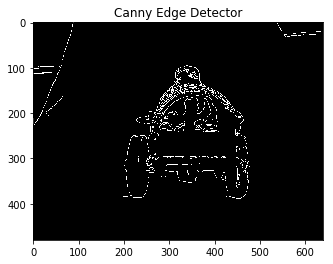

In [16]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread(img_path)

# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

plt.figure()
plt.title('Canny Edge Detector')
#plt.imsave('dancing-spider-canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

(480, 640, 3)


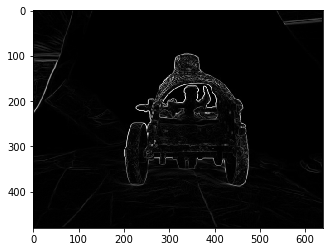

In [17]:
img = np.array(Image.open("sobel.png")).astype(np.uint8)
img2 = img[:,:,:3]
print(img2.shape)
plt.imshow(img2)

In [239]:
# YOLO V1
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
    
        # Original Architecture
        
        self.conv1 = nn.Conv2d(3, 8, kernel_size=(3,3), stride=(2,2), bias=False, padding=(1,1))
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3,3), stride=(2,2), bias=False, padding=(1,1))
        self.conv3 = nn.Conv2d(16, 64, kernel_size=(3,3), stride=(2,2), bias=False, padding=(1,1))
        #self.conv4 = nn.Conv2d(32, 64, kernel_size=(3,3), stride=(1,1), bias=False)
        
        self.fc1 = nn.Linear(15*20*64, 10000)
        self.fc2 = nn.Linear(10000, 1000)
        self.fc3 = nn.Linear(1000, 32)
        self.fc4 = nn.Linear(32, 4) # confidence, x-top, y-top, height, width
        
        self.pool = nn.MaxPool2d(2, 2)
        self.avgpool = nn.AvgPool2d(2,2)
        self.dropout = nn.Dropout(0.5)
        
        '''
        self.conv1 = nn.Conv2d(3, 64, kernel_size=(7,7), stride=2, padding=3)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=(3,3), padding=1)
        self.conv3 = nn.Conv2d(192, 128, kernel_size=(1,1))
        self.conv4 = nn.Conv2d(128, 256, kernel_size=(3,3), padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=(1,1))
        self.conv6 = nn.Conv2d(256, 512, kernel_size=(1,1))
        self.conv7 = nn.Conv2d(512, 256, kernel_size=(1,1))
        self.conv8 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=1)
        self.conv9 = nn.Conv2d(512, 256, kernel_size=(1,1))
        self.conv10 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=1)
        self.conv11 = nn.Conv2d(512, 256, kernel_size=(1,1))
        self.conv12 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=1)
        self.conv13 = nn.Conv2d(512, 256, kernel_size=(1,1))
        self.conv14 = nn.Conv2d(256, 512, kernel_size=(3,3), padding=1)
        self.conv15 = nn.Conv2d(512, 512, kernel_size=(1,1))
        self.conv16 = nn.Conv2d(512, 1024, kernel_size=(3,3), padding=1)
        self.conv17 = nn.Conv2d(1024, 512, kernel_size=(1,1))
        self.conv18 = nn.Conv2d(512, 1024, kernel_size=(3,3), padding=1)
        self.conv19 = nn.Conv2d(1024, 512, kernel_size=(1,1))
        self.conv20 = nn.Conv2d(512, 1024, kernel_size=(3,3), padding=1)
        self.conv21 = nn.Conv2d(1024, 1024, kernel_size=(3,3), padding=1)
        self.conv22 = nn.Conv2d(1024, 1024, kernel_size=(3,3), stride=2, padding=1)
        self.conv23 = nn.Conv2d(1024, 1024, kernel_size=(3,3), padding=1)
        self.conv24 = nn.Conv2d(1024, 1024, kernel_size=(3,3), padding=1)
        
        self.fc1 = nn.Linear(1024*8*10, 4096)
        self.fc2 = nn.Linear(4096, 400) # 8*10 grid * 5 for each -> Confidence, x,y,h,w
        
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        '''

    def sigmoid(self, z):
        return 1/(1+torch.exp(-z))
    
    def forward(self, x):
        
        # Original Forward Pass
        
        x = F.relu(self.conv1(x))
        #print("1", x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print("2", x.shape)
        x = self.avgpool(F.relu(self.conv3(x)))
        #print("3", x.shape)
        #x = F.relu(self.conv4(x))
        #print("4", x.shape)
        
        x = x.view(-1,15*20*64)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        #x = self.fc4(x)
        x = self.sigmoid(self.fc4(x))
        m = torch.tensor([[640, 480, 640, 480]]).type(torch.FloatTensor)
        x = x*m
        
        '''
        x = F.leaky_relu(self.pool(self.conv1(x)))
        #print(x.shape)
        x = F.leaky_relu(self.pool(self.conv2(x)))
        #print(x.shape)
        x = F.leaky_relu(self.conv3(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv4(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv5(x))
        #print(x.shape)
        x = F.leaky_relu(self.pool(self.conv6(x)))
        #print(x.shape)
        x = F.leaky_relu(self.conv7(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv8(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv9(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv10(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv11(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv12(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv13(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv14(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv15(x))
        #print(x.shape)
        x = F.leaky_relu(self.pool(self.conv16(x)))
        #print(x.shape)
        x = F.leaky_relu(self.conv17(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv18(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv19(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv20(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv21(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv22(x))
        #print(x.shape)
        x = F.leaky_relu(self.conv23(x))
        #print(x.shape)
        x = self.conv24(x)
        #print(x.shape)
        
        x = x.view(-1,1024*8*10)
        
        x = self.fc1(x)
        #print(x.shape)
        x = self.fc2(x)
        #print(x.shape)
        '''
        
        return x
    
# instantiate the model and set the weights
model = Net()

# print out the layer in the network
print(model.parameters)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model.to(device)
print(device)

<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (conv3): Conv2d(16, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (fc1): Linear(in_features=19200, out_features=10000, bias=True)
  (fc2): Linear(in_features=10000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=4, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout): Dropout(p=0.5)
)>
cpu


In [ ]:
# YOLO V2
class Yolov2(nn.Module):
    
    def __init__(self):
        super(Yolov2, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=1, stride=1, padding=0, bias=False)
        self.batchnorm4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm5 = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=1, stride=1, padding=0, bias=False)
        self.batchnorm7 = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm8 = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm9 = nn.BatchNorm2d(512)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=1, stride=1, padding=0, bias=False)
        self.batchnorm10 = nn.BatchNorm2d(256)
        self.conv11 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm11 = nn.BatchNorm2d(512)
        self.conv12 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=1, stride=1, padding=0, bias=False)
        self.batchnorm12 = nn.BatchNorm2d(256)
        self.conv13 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm13 = nn.BatchNorm2d(512)
        
        self.conv14 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm14 = nn.BatchNorm2d(1024)
        self.conv15 = nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=1, stride=1, padding=0, bias=False)
        self.batchnorm15 = nn.BatchNorm2d(512)
        self.conv16 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm16 = nn.BatchNorm2d(1024)
        self.conv17 = nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=1, stride=1, padding=0, bias=False)
        self.batchnorm17 = nn.BatchNorm2d(512)
        self.conv18 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm18 = nn.BatchNorm2d(1024)

        self.conv19 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm19 = nn.BatchNorm2d(1024)
        self.conv20 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm20 = nn.BatchNorm2d(1024)
        
        self.conv21 = nn.Conv2d(in_channels=3072, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm21 = nn.BatchNorm2d(1024)
        
        self.conv22 = nn.Conv2d(in_channels=1024, out_channels=125, kernel_size=1, stride=1, padding=0)
        
    def reorg_layer(self, x):
        stride = 2
        batch_size, channels, height, width = x.size()
        new_ht = height/stride
        new_wd = width/stride
        new_channels = channels * stride * stride
        
        passthrough = x.permute(0, 2, 3, 1)
        passthrough = passthrough.contiguous().view(-1, new_ht, stride, new_wd, stride, channels)
        passthrough = passthrough.permute(0, 1, 3, 2, 4, 5)
        passthrough = passthrough.contiguous().view(-1, new_ht, new_wd, new_channels)
        passthrough = passthrough.permute(0, 3, 1, 2)
        return passthrough

    def forward(self, x):
        out = F.max_pool2d(F.leaky_relu(self.batchnorm1(self.conv1(x)), negative_slope=0.1), 2, stride=2)
        out = F.max_pool2d(F.leaky_relu(self.batchnorm2(self.conv2(out)), negative_slope=0.1), 2, stride=2)
        
        out = F.leaky_relu(self.batchnorm3(self.conv3(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm4(self.conv4(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm5(self.conv5(out)), negative_slope=0.1)
        out = F.max_pool2d(out, 2, stride=2)
        
        out = F.leaky_relu(self.batchnorm6(self.conv6(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm7(self.conv7(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm8(self.conv8(out)), negative_slope=0.1)
        out = F.max_pool2d(out, 2, stride=2)

        out = F.leaky_relu(self.batchnorm9(self.conv9(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm10(self.conv10(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm11(self.conv11(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm12(self.conv12(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm13(self.conv13(out)), negative_slope=0.1)
        passthrough = self.reorg_layer(out)
        out = F.max_pool2d(out, 2, stride=2)

        out = F.leaky_relu(self.batchnorm14(self.conv14(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm15(self.conv15(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm16(self.conv16(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm17(self.conv17(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm18(self.conv18(out)), negative_slope=0.1)

        out = F.leaky_relu(self.batchnorm19(self.conv19(out)), negative_slope=0.1)
        out = F.leaky_relu(self.batchnorm20(self.conv20(out)), negative_slope=0.1)
        
        out = torch.cat([passthrough, out], 1)
        out = F.leaky_relu(self.batchnorm21(self.conv21(out)), negative_slope=0.1)
        out = self.conv22(out)

        return out

# Loss Function

In [19]:
# YOLO V1
import pickle as pkl

def logloss(pred, target):
    assert pred.shape == target.shape, "Input and target must be the same shape"
    pred = pred.view(-1,1)
    target = target.view(-1,1)
    
    sigmoid = torch.nn.Sigmoid()(pred)    
    
    sigmoid = sigmoid.repeat(1,2)
    
    sigmoid[:,0] = 1 - sigmoid[:,0]
    
    sigmoid = sigmoid[torch.arange(sigmoid.shape[0]).long(), target.squeeze().long()]
        
    loss = -1*torch.log(sigmoid)
    
    loss[torch.nonzero(target).long()] *= 5
        
    
    if int(torch.isnan(loss).any()):
        pred_ = pred.detach().cpu().numpy()
        target_ = target.detach().cpu().numpy()
        sigmoid_ = sigmoid.detach().cpu().numpy()
        pkl.dump((pred_, target_, sigmoid_), open("nan_loss", "wb"))
        
        print("Nan Value Detected in the loss")

        
        assert False
        
    if (loss == float("inf")).any() or (loss == float("-inf")).any():
        print("Infinity encountered in loss")
        
        pred_ = pred.detach().cpu().numpy()
        target_ = target.detach().cpu().numpy()
        sigmoid_ = sigmoid.detach().cpu().numpy()
        pkl.dump((pred_, target_, sigmoid_), open("inf_loss", "wb"))
        
        
    loss = torch.sum(loss) / loss.shape[0]
    
    return loss

    
def YOLO_loss(ground_truth, output):

    total_loss = 0
    print(ground_truth.shape)
    print(output.shape)
    #get the objectness loss
    loss_inds = torch.nonzero(ground_truth[:,:,-4] > -1)
    
    objectness_pred = output[loss_inds[:,0],loss_inds[:,1],4]
    
    target = ground_truth[loss_inds[:,0],loss_inds[:,1],4]
    
    
    objectness_loss = torch.nn.MSELoss(size_average=False)(objectness_pred, target)

    print("Obj Loss", objectness_loss)

    #Only objectness loss is counted for all boxes
    object_box_inds = torch.nonzero(ground_truth[:,:,4] > 0).view(-1, 2)

    try:
        gt_ob = ground_truth[object_box_inds[:,0], object_box_inds[:,1]]
    except IndexError:
        return None
    
    pred_ob = output[object_box_inds[:,0], object_box_inds[:,1]]
    
    centre_x_loss = torch.nn.MSELoss(size_average=False)(pred_ob[:,0], gt_ob[:,0])
    centre_y_loss = torch.nn.MSELoss(size_average=False)(pred_ob[:,1], gt_ob[:,1])
    
    print("Num_gt:", gt_ob.shape[0])
    print("Center_x_loss", float(centre_x_loss))
    print("Center_y_loss", float(centre_y_loss))

    total_loss += centre_x_loss 
    total_loss += centre_y_loss 
    

    w_loss = torch.nn.MSELoss(size_average=False)(pred_ob[:,2], gt_ob[:,2])
    h_loss = torch.nn.MSELoss(size_average=False)(pred_ob[:,3], gt_ob[:,3])
    
    total_loss += w_loss 
    total_loss += h_loss 
    
    print("w_loss:", float(w_loss))
    print("h_loss:", float(h_loss))

    '''
    #class_loss 
    # cls_scores_pred = pred_ob[:,5:]
    # cls_scores_target = gt_ob[:,5].long() 
    # cls_scores_pred = torch.log(torch.sigmoid(cls_scores_pred))
    # print(cls_scores_pred.shape)
    # print(cls_scores_target.shape)
    # cls_loss = torch.nn.NLLLoss(size_average=False, reduce = False)(cls_scores_pred, cls_scores_target)

    cls_labels = torch.zeros(gt_ob.shape[0], num_classes).to(device)
    cls_labels[torch.arange(gt_ob.shape[0]).long(), gt_ob[:,5].long()] = 1
    cls_loss = 0    
    
    for c_n in range(num_classes):
        print('pred_ob', pred_ob)
        targ_labels = pred_ob[:,5 + c_n].view(-1,1)
        targ_labels = targ_labels.repeat(1,2)
        targ_labels[:,0] = 1 - targ_labels[:,0]
        cls_loss += torch.nn.CrossEntropyLoss(size_average=False)(targ_labels, cls_labels[:,c_n].long())

    print(cls_loss)
    total_loss += cls_loss
    '''
    return total_loss

In [208]:
# YOLO V2
def Yolov2Loss(output, labels, n_truths):
    B = meta['anchors']
    C = meta['classes']
    batch_size = meta['batch_size']
    threshold = meta['threshold']
    anchor_bias = meta['anchor_bias']
    scale_no_obj = meta['scale_no_obj']
    scale_coords = meta['scale_coords']
    scale_class = meta['scale_class']
    scale_obj = meta['scale_obj']
    
    H = output.size(2)
    W = output.size(3)
    
    wh = Variable(torch.from_numpy(np.reshape([W, H], [1, 1, 1, 1, 2]))).float()
    anchor_bias_var = Variable(torch.from_numpy(np.reshape(anchor_bias, [1, 1, 1, B, 2]))).float()
    
    w_list = np.array(list(range(W)), np.float32)
    wh_ids = Variable(torch.from_numpy(np.array(list(map(lambda x: np.array(list(itertools.product(w_list, [x]))), range(H)))).reshape(1, H, W, 1, 2))).float() 
    
    zero_pad = Variable(torch.zeros(2).contiguous().view(1, 2)).float()
    pad_var = Variable(torch.zeros(2*B).contiguous().view(B, 2)).float()
    
    loss = Variable(torch.Tensor([0])).float()
    class_zeros = Variable(torch.zeros(C)).float()
    mask_loss = Variable(torch.zeros(H*W*B*5).contiguous().view(H, W, B, 5)).float()
    zero_coords_loss = Variable(torch.zeros(H*W*B*4).contiguous().view(H, W, B, 4)).float()
    zero_coords_obj_loss = Variable(torch.zeros(H*W*B*5).contiguous().view(H, W, B, 5)).float()
    
    if torch.cuda.is_available():
        wh = wh.cuda()
        wh_ids = wh_ids.cuda()
        pad_var = pad_var.cuda()
        zero_pad = zero_pad.cuda()
        anchor_bias_var = anchor_bias_var.cuda()
        
        loss = loss.cuda()
        mask_loss = mask_loss.cuda()
        class_zeros = class_zeros.cuda()
        zero_coords_loss = zero_coords_loss.cuda()
        zero_coords_obj_loss = zero_coords_obj_loss.cuda()
                           

    anchor_bias_var = anchor_bias_var / wh
    anchor_padded = torch.cat([pad_var, anchor_bias_var.contiguous().view(B, 2)], 1)

    predicted = output.permute(0, 2, 3, 1)
    predicted = predicted.contiguous().view(-1, H, W, B, (4 + 1 + C))
    
    sigmoid = torch.nn.Sigmoid()
    softmax = torch.nn.Softmax(dim=4)
    
    adjusted_xy = sigmoid(predicted[:, :, :, :, :2])
    adjusted_obj = sigmoid(predicted[:, :, :, :, 4:5])
    adjusted_classes = softmax(predicted[:, :, :, :, 5:])
    
    adjusted_coords = (adjusted_xy + wh_ids) / wh

    adjusted_wh = torch.exp(predicted[:, :, :, :, 2:4]) * anchor_bias_var
    
    for batch in range(batch_size):
        
        n_true = n_truths[batch]
        if n_true == 0:
            continue

        pred_outputs = torch.cat([adjusted_coords[batch], adjusted_wh[batch]], 3)
        true_labels = labels[batch, :n_true, 1:]
        
        bboxes_iou = bbox_overlap_iou(pred_outputs, true_labels, False)
        
        # objectness loss (if iou < threshold)
        boxes_max_iou = torch.max(bboxes_iou, -1)[0]
        all_obj_mask = boxes_max_iou.le(threshold)
        all_obj_loss = all_obj_mask.unsqueeze(-1).float() *(scale_no_obj * (-1 * adjusted_obj[batch]))
        
        # each anchor box will learn its bias (if batch < 12800)
        all_coords_loss = zero_coords_loss.clone()
        if meta['iteration'] < 12800:
            all_coords_loss = scale_coords * torch.cat([(0.5 - adjusted_xy[batch]), (0 - predicted[batch, :, :, :, 2:4])], -1)
        
        coord_obj_loss = torch.cat([all_coords_loss, all_obj_loss], -1)
        
        batch_mask = mask_loss.clone()
        truth_coord_obj_loss = zero_coords_obj_loss.clone()
        # for every true label and anchor bias
        for truth_iter in torch.arange(n_true):
            truth_iter = int(truth_iter)
            truth_box = labels[batch, truth_iter]
            anchor_select = bbox_overlap_iou(torch.cat([zero_pad.t(), truth_box[3:]], 0).t(), anchor_padded, True)
            
            # find the responsible anchor box
            anchor_id = torch.max(anchor_select, 1)[1]
            
            truth_i = (truth_box[1] * W)
            w_i = truth_i.int() 
            truth_x = truth_i - w_i.float()
            truth_j = (truth_box[2] * H)
            h_j = truth_j.int()
            truth_y = truth_j - h_j.float()
            truth_wh = (truth_box[3:] / anchor_bias_var.contiguous().view(B, 2).index_select(0, anchor_id.long())).log()
            if (truth_wh[0] == Variable( - torch.cuda.FloatTensor([float('inf')]))).data[0] == 1:
                import pdb; pdb.set_trace()
    
            truth_coords = torch.cat([truth_x.unsqueeze(0), truth_y.unsqueeze(0), truth_wh], 1)
            
            predicted_output = predicted[batch].index_select(0, h_j.long()).index_select(1, w_i.long()).index_select(2, anchor_id.long())[0][0][0]
            # coords loss
            pred_xy = adjusted_xy[batch].index_select(0, h_j.long()).index_select(1, w_i.long()).index_select(2, anchor_id.long())[0][0][0]
            pred_wh = predicted_output[2:4]
            pred_coords = torch.cat([pred_xy, pred_wh], 0)
            coords_loss = scale_coords * (truth_coords - pred_coords.unsqueeze(0))
    
            # objectness loss
        
            # given the responsible box - find iou
            iou = bboxes_iou.index_select(0, h_j.long()).index_select(1, w_i.long()).index_select(2, anchor_id.long())[0][0][0][truth_iter]
            obj_loss = scale_obj * (iou - sigmoid(predicted_output[4]))
            truth_co_obj = torch.cat([coords_loss, obj_loss.view(1, 1)], 1)

            # class prob loss
            class_vec = class_zeros.index_fill(0, truth_box[0].long(), 1)
            class_loss = scale_class * (class_vec - torch.nn.Softmax(dim=0)(predicted_output[5:]))
            
            mask_ones = Variable(torch.ones(5)).float()
            if torch.cuda.is_available():
                mask_ones = mask_ones.cuda()
            
            batch_mask[h_j.long(), w_i.long(), anchor_id.long()] = mask_ones
            truth_coord_obj_loss[h_j.long(), w_i.long(), anchor_id.long()] = truth_co_obj
            
            loss += class_loss.pow(2).sum()
#         import pdb; pdb.set_trace()
        batch_coord_obj_loss = batch_mask * truth_coord_obj_loss + (1 - batch_mask) * coord_obj_loss
        
        loss += batch_coord_obj_loss.pow(2).sum()
        
    return loss
    

In [209]:
def bbox_overlap_iou(bboxes1, bboxes2, is_anchor):
    """
    Args:
        bboxes1: shape (total_bboxes1, 4)
            with x1, y1, x2, y2 point order.
        bboxes2: shape (total_bboxes2, 4)
            with x1, y1, x2, y2 point order.
        p1 *-----        
           |     |
           |_____* p2
    Returns:
        Tensor with shape (total_bboxes1, total_bboxes2)
        with the IoU (intersection over union) of bboxes1[i] and bboxes2[j]
        in [i, j].
    """
#     import pdb; pdb.set_trace()
    x1, y1, w1, h1 = bboxes1.chunk(4, dim=-1)
    x2, y2, w2, h2 = bboxes2.chunk(4, dim=-1)
    
    x11 = x1 - 0.5*w1
    y11 = y1 - 0.5*h1
    x12 = x1 + 0.5*w1
    y12 = y1 + 0.5*h1
    x21 = x2 - 0.5*w2
    y21 = y2 - 0.5*h2
    x22 = x2 + 0.5*w2
    y22 = y2 + 0.5*h2
    
#     x11 = torch.clamp(x11, min=0, max=1)
#     y11 = torch.clamp(y11, min=0, max=1)
#     x12 = torch.clamp(x12, min=0, max=1)
#     y12 = torch.clamp(y12, min=0, max=1)
#     x21 = torch.clamp(x21, min=0, max=1)
#     y21 = torch.clamp(y21, min=0, max=1)
#     x22 = torch.clamp(x22, min=0, max=1)
#     y22 = torch.clamp(y22, min=0, max=1)
    

    xI1 = torch.max(x11, x21.transpose(1, 0))
    yI1 = torch.max(y11, y21.transpose(1, 0))
    
    xI2 = torch.min(x12, x22.transpose(1, 0))
    yI2 = torch.min(y12, y22.transpose(1, 0))

    inner_box_w = torch.clamp((xI2 - xI1), min=0)
    inner_box_h = torch.clamp((yI2 - yI1), min=0)
    
    inter_area = inner_box_w * inner_box_h
    bboxes1_area = (x12 - x11) * (y12 - y11)
    bboxes2_area = (x22 - x21) * (y22 - y21)

    union = (bboxes1_area + bboxes2_area.transpose(1, 0)) - inter_area
    return torch.clamp(inter_area / union, min=0)

In [210]:
def get_nms_boxes(output, obj_thresh, iou_thresh):
#     import pdb; pdb.set_trace()
    N, C, H, W = output.size()
    N, C, H, W = int(N), int(C), int(H), int(W)
    B = meta['anchors']
    anchor_bias = meta['anchor_bias']
    n_classes = meta['classes']
    
    # -1 => unprocesse, 0 => suppressed, 1 => retained
    box_tags = Variable(-1 * torch.ones(H*W*B)).float()
    
    wh = Variable(torch.from_numpy(np.reshape([W, H], [1, 1, 1, 1, 2]))).float()
    anchor_bias_var = Variable(torch.from_numpy(np.reshape(anchor_bias, [1, 1, 1, B, 2]))).float()
    
    w_list = np.array(list(range(W)), np.float32)
    wh_ids = Variable(torch.from_numpy(np.array(list(map(lambda x: np.array(list(itertools.product(w_list, [x]))), range(H)))).reshape(1, H, W, 1, 2))).float() 
    
    if torch.cuda.is_available():
        wh = wh.cuda()
        wh_ids = wh_ids.cuda()
        box_tags = box_tags.cuda()
        anchor_bias_var = anchor_bias_var.cuda()                           

    anchor_bias_var = anchor_bias_var / wh

    predicted = output.permute(0, 2, 3, 1)
    predicted = predicted.contiguous().view(N, H, W, B, -1)
    sigmoid = torch.nn.Sigmoid()
    softmax = torch.nn.Softmax(dim=4)
    
    adjusted_xy = sigmoid(predicted[:, :, :, :, :2])
    adjusted_obj = sigmoid(predicted[:, :, :, :, 4:5])
    adjusted_classes = softmax(predicted[:, :, :, :, 5:])
    
    adjusted_coords = (adjusted_xy + wh_ids) / wh
    adjusted_wh = torch.exp(predicted[:, :, :, :, 2:4]) * anchor_bias_var

    batch_boxes = defaultdict()

    for n in range(N):
        
        scores = (adjusted_obj[n] * adjusted_classes[n]).contiguous().view(H*W*B, -1)
    
        class_probs = adjusted_classes[n].contiguous().view(H*W*B, -1)
        class_ids = torch.max(class_probs, 1)[1]
            
        pred_outputs = torch.cat([adjusted_coords[n], adjusted_wh[n]], 3)
        pred_bboxes = pred_outputs.contiguous().view(H*W*B, 4)
        ious = bbox_overlap_iou(pred_bboxes, pred_bboxes, True)
        
        confidences = adjusted_obj[n].contiguous().view(H*W*B)
        # get all boxes with tag -1
        final_boxes = Variable(torch.FloatTensor())
        if torch.cuda.is_available():
            final_boxes = final_boxes.cuda()
   
        for class_id in range(n_classes):
            bboxes_state = ((class_ids==class_id).float() * (scores[:, class_id] > obj_thresh).float() * box_tags).long().float()
        
            while (torch.sum(bboxes_state==-1) > 0).data[0]:
                max_conf, index = torch.max(scores[:, class_id] * (bboxes_state==-1).float(), 0)
                bboxes_state = ((ious[index] < iou_thresh)[0].float() * bboxes_state).long().float()
                bboxes_state[index] = 1

                index_vals = torch.cat([pred_bboxes[index], confidences[index].view(1, 1), class_probs[index]], 1)
                if len(final_boxes.size()) == 0:
                    final_boxes = index_vals
                else:
                    final_boxes = torch.cat([final_boxes, index_vals], 0)
        
        batch_boxes[n] = final_boxes
        
    return batch_boxes

In [211]:
# Non Max Suppression
def get_nms_detections(output, obj_thresh, iou_thresh):
#     import pdb; pdb.set_trace()
    N, C, H, W = output.size()
    N, C, H, W = int(N), int(C), int(H), int(W)
    B = meta['anchors']
    anchor_bias = meta['anchor_bias']
    
    # -1 => unprocesse, 0 => suppressed, 1 => retained
    box_tags = Variable(-1 * torch.ones(H*W*B)).float()
    
    wh = Variable(torch.from_numpy(np.reshape([W, H], [1, 1, 1, 1, 2]))).float()
    anchor_bias_var = Variable(torch.from_numpy(np.reshape(anchor_bias, [1, 1, 1, B, 2]))).float()
    
    w_list = np.array(list(range(W)), np.float32)
    wh_ids = Variable(torch.from_numpy(np.array(list(map(lambda x: np.array(list(itertools.product(w_list, [x]))), range(H)))).reshape(1, H, W, 1, 2))).float() 
    
    if torch.cuda.is_available():
        wh = wh.cuda()
        wh_ids = wh_ids.cuda()
        box_tags = box_tags.cuda()
        anchor_bias_var = anchor_bias_var.cuda()                           

    anchor_bias_var = anchor_bias_var / wh

    predicted = output.permute(0, 2, 3, 1)
    predicted = predicted.contiguous().view(N, H, W, B, -1)
    

    
    sigmoid = torch.nn.Sigmoid()
    softmax = torch.nn.Softmax(dim=4)
    
    adjusted_xy = sigmoid(predicted[:, :, :, :, :2])
    adjusted_obj = sigmoid(predicted[:, :, :, :, 4:5])
    adjusted_classes = softmax(predicted[:, :, :, :, 5:])
    
    adjusted_coords = (adjusted_xy + wh_ids) / wh
    adjusted_wh = torch.exp(predicted[:, :, :, :, 2:4]) * anchor_bias_var

    batch_boxes = defaultdict()

    for n in range(N):
        
        class_probs = adjusted_classes[n].contiguous().view(H*W*B, -1)
        pred_outputs = torch.cat([adjusted_coords[n], adjusted_wh[n]], 3)
        pred_bboxes = pred_outputs.contiguous().view(H*W*B, 4)
        ious = bbox_overlap_iou(pred_bboxes, pred_bboxes, True)
        
        confidences = adjusted_obj[n].contiguous().view(H*W*B)
        bboxes_state = ((confidences>obj_thresh).float() * box_tags).long().float()
        
        # get all boxes with tag -1
        final_boxes = Variable(torch.FloatTensor())
        if torch.cuda.is_available():
            final_boxes = final_boxes.cuda()
        while (torch.sum(bboxes_state==-1) > 0).data[0]:
            max_conf, index = torch.max(confidences * (bboxes_state==-1).float(), 0)
            bboxes_state = ((ious[index] < iou_thresh)[0].float() * bboxes_state).long().float()
            bboxes_state[index] = 1
            
            index_vals = torch.cat([pred_bboxes[index], confidences[index].view(1, 1), class_probs[index]], 1)
            if len(final_boxes.size()) == 0:
                final_boxes = index_vals
            else:
                final_boxes = torch.cat([final_boxes, index_vals], 0)
        
        batch_boxes[n] = final_boxes
        
    return batch_boxes

In [212]:
def calc_map(boxes_dict, iou_threshold=0.5):
#     import pdb; pdb.set_trace()
    v = Variable(torch.zeros(1))
    if torch.cuda.is_available():
        v = v.cuda()
    
    if (len(boxes_dict['ground_truth'].size())==0) | (len(boxes_dict['prediction'].size())==0):
        return v

    gt = boxes_dict['ground_truth']
    pr = boxes_dict['prediction']

    gt_matched = Variable(-torch.ones(gt.size(0)))
    pr_matched = Variable(-torch.ones(pr.size(0)))

    if torch.cuda.is_available():
        gt_matched = gt_matched.cuda()
        pr_matched = pr_matched.cuda()
            
    for i in range(len(pr)):
        b = pr[i]
        ious = bbox_overlap_iou(b[:4].view(1, 4), gt, True)
        matched_scores = (gt_matched == -1).float() * (ious[0]>iou_threshold).float() * ious[0]
        if torch.sum(matched_scores).data[0] > 0:
            gt_idx = torch.max(matched_scores, 0)[1]
            gt_matched[gt_idx] = i
            pr_matched[i] = gt_idx
        
    tp = (pr_matched != -1).float()
    fp = (pr_matched == -1).float()
    tp_cumsum = torch.cumsum(tp, 0)
    fp_cumsum = torch.cumsum(fp, 0)
    n_corrects = tp_cumsum * tp
    total = tp_cumsum + fp_cumsum
    precision = n_corrects / total
    for i in range(precision.size(0)):
        precision[i] = torch.max(precision[i:])

    average_precision = torch.sum(precision) / len(gt)
    return average_precision
    
    
def evaluation(ground_truths, nms_output, n_truths, iou_thresh):
#     import pdb; pdb.set_trace()
    N = ground_truths.size(0)
    
    mean_avg_precision = Variable(torch.FloatTensor([0]))
    if torch.cuda.is_available():
        mean_avg_precision = mean_avg_precision.cuda()

    for batch in range(int(N)):
        category_map = defaultdict(lambda: defaultdict(lambda: torch.FloatTensor()))
        
        if n_truths[batch] == 0:
            continue

        ground_truth = ground_truths[batch, :n_truths[batch]]
        for gt in ground_truth:
            gt_class = gt[0].int().data[0]
            t1 = category_map[gt_class]['ground_truth']
            if len(t1.size()) == 0:
                t1 = gt[1:].unsqueeze(0)
            else:
                t1 = torch.cat([t1, gt[1:].unsqueeze(0)], 0)
            category_map[gt_class]['ground_truth'] = t1
            
        nms_boxes = nms_output[batch]
        if len(nms_boxes.size()) == 0:
            continue

        for box in nms_boxes:
            class_id = (torch.max(box[5:], 0)[1]).int().data[0]
            t2 = category_map[class_id]['prediction']
            if len(t2.size()) == 0:
                t2 = box[:5].unsqueeze(0)
            else:
                t2 = torch.cat([t2, box[:5].unsqueeze(0)], 0)
            category_map[class_id]['prediction'] = t2
        cat_ids = category_map.keys()
#         return category_map
        mean_avg_precision += torch.mean(torch.cat([calc_map(category_map[cat_id], iou_thresh) for cat_id in cat_ids], 0 ))
    return mean_avg_precision/N

In [213]:
def draw_boundary_box(image_dict):
    """Show image with landmarks"""
    image = image_dict['image']
    bboxes = image_dict['bboxes']
    plt.imshow(image)
    for bbox in bboxes:
        xmin = bbox[1]
        ymin = bbox[2]
        xmax = bbox[3]
        ymax = bbox[4]
        plt.plot((xmin, xmin), (ymin, ymax), 'g')
        plt.plot((xmin, xmax), (ymin, ymin), 'g')
        plt.plot((xmax, xmax), (ymin, ymax), 'g')
        plt.plot((xmin, xmax), (ymax, ymax), 'g')

def draw_boundary_box_fraction(image_dict):
    """Show image with landmarks"""
    image = image_dict['image']
    height, width, channels = image.shape
    bboxes = image_dict['bboxes']
    plt.imshow(image)
    for bbox in bboxes:
        x = bbox[1] * width
        y = bbox[2] * height
        w = bbox[3] * width
        h = bbox[4] * height
        xmin = max(0, int(x - w*0.5))
        ymin = max(0, int(y - h*0.5))
        xmax = min(int(x + w*0.5), width)
        ymax = min(int(y + h*0.5), height)
        plt.plot((xmin, xmin), (ymin, ymax), 'g')
        plt.plot((xmin, xmax), (ymin, ymin), 'g')
        plt.plot((xmax, xmax), (ymin, ymax), 'g')
        plt.plot((xmin, xmax), (ymax, ymax), 'g')

def draw_bbox_torch(img_dict):
    image = np.transpose(np.array(img_dict['image'].numpy()*255, np.uint8), (1, 2, 0))
    bboxes = img_dict['bboxes'].numpy()
    n_true = np.sum(bboxes[:, 0]!=-1)
    bboxes = bboxes[:n_true]
    draw_boundary_box_fraction({"image": image, 'bboxes': bboxes})

def draw_bbox_nms(torch_img, nms_output):
    image = np.transpose(np.array(torch_img.data.numpy()*255, np.uint8), (1, 2, 0))
    bboxes = nms_output[:, :4].data.numpy()
    bboxes = np.concatenate([np.zeros(len(bboxes)).reshape(len(bboxes), 1), bboxes], 1)
    print (bboxes)
    draw_boundary_box_fraction({"image": image, 'bboxes': bboxes})

In [215]:
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

data_dir = 'Challenges/Flipkart Challenge'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'

len_train = 14000
indices = list(range(14000))

train_idx = indices[:11200]
valid_idx = indices[11200:]

train_indices = SubsetRandomSampler(train_idx)
valid_indices = SubsetRandomSampler(valid_idx)

# Using random rotation, random resize and random flips (horizontal and vertical)
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Just resize and crop
val_test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Using the image datasets and the trainforms, define the dataloaders
train_batch = 64
valid_batch = 32
test_batch = 64

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch, shuffle=False, sampler=train_indices)
validloader = torch.utils.data.DataLoader(train_dataset, batch_size=valid_batch, shuffle=False, sampler=valid_indices)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch, shuffle=False)

print(len(validloader))
images, labels = next(iter(validloader))
print(images.shape)
print(labels.shape)

88
torch.Size([32, 3, 480, 640])
torch.Size([32])


In [13]:
images, labels = next(iter(trainloader))
print(images)

tensor([[[[ 0.4337,  0.4508,  0.4337,  ...,  1.1872,  1.1529,  1.1015],
          [ 0.3994,  0.4337,  0.4337,  ...,  1.1700,  1.1529,  1.1187],
          [ 0.3652,  0.4337,  0.4337,  ...,  1.1700,  1.1700,  1.1529],
          ...,
          [ 0.8789,  0.8961,  0.8961,  ...,  0.2624,  0.2282,  0.1939],
          [ 0.8618,  0.8789,  0.8789,  ...,  0.2282,  0.1939,  0.1597],
          [ 0.8618,  0.8789,  0.8618,  ...,  0.2282,  0.1939,  0.1597]],

         [[ 0.5903,  0.6078,  0.5903,  ...,  1.2731,  1.2381,  1.1856],
          [ 0.5553,  0.5903,  0.5903,  ...,  1.2556,  1.2381,  1.2031],
          [ 0.5203,  0.5903,  0.5903,  ...,  1.2556,  1.2556,  1.2381],
          ...,
          [ 1.0280,  1.0455,  1.0455,  ...,  0.3627,  0.3277,  0.2927],
          [ 1.0105,  1.0280,  1.0280,  ...,  0.3277,  0.2927,  0.2577],
          [ 1.0105,  1.0280,  1.0105,  ...,  0.3277,  0.2927,  0.2577]],

         [[ 0.8971,  0.9145,  0.8971,  ...,  1.4374,  1.4025,  1.3502],
          [ 0.8622,  0.8971,  

In [216]:
f = open("Challenges/Flipkart Challenge/training.csv")
lines = f.readlines()
x = []
y = []
h = []
w = []
counter = 0
for line in lines:
    if counter != 0:
        img_name, x11,x21,y11,y21 = line.strip().split(',')
        x.append(int(x11))
        y.append(int(x21))
        w.append(int(y11))
        h.append(int(y21))
    counter += 1
    
f.close()

#test_data = pd.read_csv("Challenges/Flipkart Challenge/test.csv")

In [217]:
labels_ls = []
for i in range(len(x)):
    l = []
    l.append(x[i])
    l.append(y[i])
    l.append(w[i])
    l.append(h[i])
    labels_ls.append(l)
    
labels_ls = torch.FloatTensor(labels_ls)
print(labels_ls[0:10])

tensor([[115., 495., 143., 325.],
        [ 23., 457.,  61., 409.],
        [ 37., 601.,  13., 470.],
        [ 27., 602., 162., 385.],
        [ 60., 586., 174., 325.],
        [ 35., 549.,  37., 442.],
        [ 77., 558.,  86., 434.],
        [ 50., 627.,  95., 320.],
        [104., 552.,  83., 428.],
        [134., 500.,  67., 429.]])


In [232]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # momentum=0.9, weight_decay=0.0005
scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=20,gamma=10)

total_epochs = 20

In [240]:
every_step = 1
valid_loss_min = np.Inf

for epoch in range(total_epochs):
    
    ######################
    ###### Training ######
    ######################
    
    scheduler.step()
    
    training_loss = 0
    validation_loss = 0
    counter = 0
    model.train()
    
    for images, labels in trainloader:
        counter+=1
        print("Training Batch: ", counter)
        
        images, labels = images.to(device), labels.to(device) 
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        
        if counter*train_batch < 11200:
            labels = labels_ls[(counter-1)*train_batch:counter*train_batch] 
        else:
            labels = labels_ls[(counter-1)*train_batch:11200]
        
        loss = criterion(output, labels)
        #loss = YOLO_loss(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        training_loss += loss.item()
        
        if counter == 20:
            break
        
    if epoch%every_step == 0:

        ######################
        ##### Validation ####
        #####################

        valid_counter = 0
        model.eval()

        for data, target in validloader:

            valid_counter += 1
            print("Validation Batch: ", valid_counter)

            data, target = data.to(device), target.to(device)

            out = model.forward(data)

            if valid_counter*valid_batch+11200 <= 14000:
                target = labels_ls[(valid_counter-1)*valid_batch+11200:valid_counter*valid_batch+11200]
            else:
                target = labels_ls[(valid_counter-1)*valid_batch+11200:valid_counter*valid_batch+14000]

            #valid_loss = criterion(out, target)
            valid_loss = criterion(out, target)

            validation_loss += valid_loss.item()

        # calculating average losses
        training_loss = training_loss/len(trainloader.dataset)
        validation_loss = validation_loss/len(validloader.dataset)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, training_loss, validation_loss))

        # save model if validation loss has decreased
        if validation_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            validation_loss))
            torch.save(model.state_dict(), 'object_localisation.pt')
            valid_loss_min = validation_loss
            

Training Batch:  1
Training Batch:  2
Training Batch:  3
Training Batch:  4
Training Batch:  5
Training Batch:  6
Training Batch:  7
Training Batch:  8
Training Batch:  9
Training Batch:  10
Training Batch:  11
Training Batch:  12
Training Batch:  13
Training Batch:  14
Training Batch:  15
Training Batch:  16
Training Batch:  17
Training Batch:  18
Training Batch:  19
Training Batch:  20
Validation Batch:  1
Validation Batch:  2
Validation Batch:  3
Validation Batch:  4
Validation Batch:  5
Validation Batch:  6
Validation Batch:  7
Validation Batch:  8
Validation Batch:  9
Validation Batch:  10
Validation Batch:  11
Validation Batch:  12
Validation Batch:  13
Validation Batch:  14
Validation Batch:  15
Validation Batch:  16
Validation Batch:  17
Validation Batch:  18
Validation Batch:  19
Validation Batch:  20
Validation Batch:  21
Validation Batch:  22
Validation Batch:  23
Validation Batch:  24
Validation Batch:  25
Validation Batch:  26
Validation Batch:  27
Validation Batch:  28
Va

KeyboardInterrupt: 

In [238]:
'''
images, labels = next(iter(trainloader))
output = model.forward(images)
print(output)
print(labels)
'''
for images, labels in trainloader:
    out = model.forward(images)
    #print(out)
    labels = labels_ls[0*train_batch:1*train_batch]
    #print(labels)
    loss = criterion(out, labels)
    print(loss)

tensor(4768.4458, grad_fn=<MseLossBackward>)
tensor(5302.9585, grad_fn=<MseLossBackward>)
tensor(5177.5850, grad_fn=<MseLossBackward>)
tensor(4873.1270, grad_fn=<MseLossBackward>)
tensor(5490.7764, grad_fn=<MseLossBackward>)
tensor(4904.6094, grad_fn=<MseLossBackward>)
tensor(5388.0303, grad_fn=<MseLossBackward>)
tensor(4864.0981, grad_fn=<MseLossBackward>)
tensor(4951.0405, grad_fn=<MseLossBackward>)
tensor(5341.6836, grad_fn=<MseLossBackward>)
tensor(5300.5874, grad_fn=<MseLossBackward>)
tensor(5379.4839, grad_fn=<MseLossBackward>)
tensor(5259.6592, grad_fn=<MseLossBackward>)
tensor(5267.3691, grad_fn=<MseLossBackward>)


KeyboardInterrupt: 

In [ ]:
mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
#std*img+mean

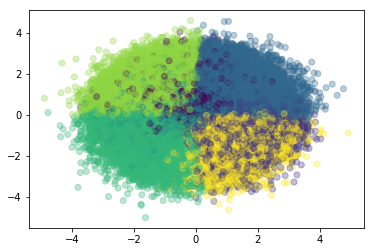

In [608]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

f = open("Challenges/Flipkart Challenge/test.csv","r")
lines = f.readlines()


arr = np.random.randn(500000*3).reshape((500000, 3))
x, y = kmeans2(whiten(arr), 7, iter = 20)  #<--- I randomly picked 7 clusters
plt.scatter(arr[:,0], arr[:,1], c=y, alpha=0.33333);

[[ 0.04840052 -0.60431296]
 [-2.90377556 -1.76762122]
 [ 0.76034237 -1.21721296]
 ...
 [-0.63132708 -1.3974623 ]
 [-1.47312419 -1.28925192]
 [ 0.98895455  0.65578892]]
[1 1 2 ... 2 1 0]


/Users/harshpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


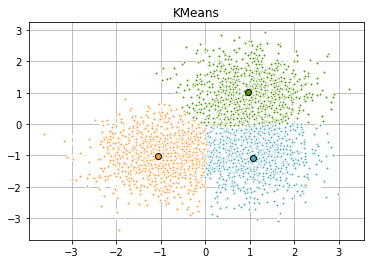

In [610]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

##############################################################################
# Generate sample data
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
print(X)
print(labels_true)

##############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

##############################################################################
# Plot result

colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.figure()
plt.hold(True)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')    
plt.grid(True)
plt.show()

In [846]:
f = open("files/2.txt","r")
lines = f.readlines()

final = []
for line in lines:
    x,y = line.strip().split(',')
    l = []
    l.append((float)(x))
    l.append((float)(y))
    final.append(l)
print(final)
print(len(final))

[[81.291, 283.21], [82.947, 273.06], [82.791, 294.33], [87.422, 270.05], [87.198, 299.46], [92.232, 296.83], [91.957, 299.39], [92.746, 270.81], [92.854, 301.65], [95.909, 302.84], [98.063, 296.71], [100.84, 302.83], [102.13, 299.27], [104.25, 294.72], [105.9, 304.06], [110.32, 305.21], [110.68, 295.1], [113.03, 304.38], [113.29, 277.36], [113.41, 282.63], [116.59, 279.66], [121.39, 279.64], [123.63, 305.33], [125.94, 306.09], [130.14, 279.5], [131.15, 233.75], [130.88, 241.69], [135.06, 227.05], [134.58, 271.91], [135.02, 307.93], [136.21, 224.17], [137.28, 275.94], [139.09, 208.14], [138.5, 213.47], [141.55, 276.94], [142.75, 202.86], [142.77, 310.21], [143.6, 249.09], [144.32, 257.93], [145.48, 277.39], [148.94, 262.33], [149.15, 263.82], [148.73, 277.12], [149.91, 198.99], [151.28, 215.41], [153.66, 274.43], [155.4, 194.0], [155.17, 315.06], [156.86, 209.59], [158.46, 235.74], [158.0, 316.0], [158.88, 243.22], [162.06, 204.02], [162.16, 274.85], [162.23, 301.39], [163.79, 189.37], 

In [847]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array(final)
clustering = DBSCAN(eps=45, min_samples=10).fit(X)
arr = clustering.labels_
unique, counts = np.unique(arr, return_counts=True)
dt = dict(zip(unique, counts))
print(dt)
ls = list(dt.keys())
print(ls[0])

{0: 529}
0


In [704]:
clustering 

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [856]:
fw = open("latest.txt","w")
for j in range(1,12816):
    
    f = open(f'files/{j}.txt',"r")
    lines = f.readlines()

    final = []
    for line in lines:
        x,y = line.strip().split(',')
        l = []
        l.append((float)(x))
        l.append((float)(y))
        final.append(l)
        
    X = np.array(final)
    clustering = DBSCAN(eps=45, min_samples=10).fit(X)
    arr = clustering.labels_
    unique, counts = np.unique(arr, return_counts=True)
    dt = dict(zip(unique, counts))
    
    index = 0
    maxi = 0
    counter = 0
    for value in dt.values():
        if value > maxi:
            maxi = value
            index = counter
        counter += 1
        
    l = list(dt.keys())
    max_occur = l[index]
    
    start = 0
    end = 0
    isChecked = False
    
    for i in range(len(arr)):
        if not isChecked:
            if arr[i] == max_occur and arr[i+1] == max_occur and arr[i+2] == max_occur and arr[i+3] == max_occur:
                start = i
                isChecked = True
        if isChecked:
            if i < len(arr) - 3:
                if arr[i] != max_occur and arr[i+1] != max_occur and arr[i+2] != max_occur:
                    end = i
            else:
                end = i
                
    final_arr = []
    for i in range(len(final)):
        if i >= start and i <= end:
            final_arr.append(final[i])
            
    minx = final_arr[0][0]
    maxx = final_arr[len(final_arr)-1][0]
    
    miny = 999
    for i in final_arr:
        if i[1] < miny:
            miny = i[1]
            
    maxy = 0
    for i in final_arr:
        if i[1] > maxy:
            maxy = i[1]
      
    print(f'j - {j}, start - {start}, end - {end}')
    fw.write(f'{minx},{maxx},{miny},{maxy}\n')

f.close()

j - 1, start - 0, end - 282
j - 2, start - 0, end - 528
j - 3, start - 24, end - 958
j - 4, start - 10, end - 529
j - 5, start - 4, end - 1125
j - 6, start - 0, end - 659
j - 7, start - 19, end - 724
j - 8, start - 0, end - 490
j - 9, start - 75, end - 697
j - 10, start - 0, end - 2334
j - 11, start - 111, end - 633
j - 12, start - 66, end - 399
j - 13, start - 0, end - 224
j - 14, start - 16, end - 366
j - 15, start - 206, end - 445
j - 16, start - 17, end - 704
j - 17, start - 6, end - 430
j - 18, start - 142, end - 573
j - 19, start - 14, end - 804
j - 20, start - 46, end - 790
j - 21, start - 2, end - 1180
j - 22, start - 0, end - 1126
j - 23, start - 0, end - 104
j - 24, start - 13, end - 164
j - 25, start - 0, end - 1109
j - 26, start - 56, end - 1163
j - 27, start - 0, end - 258
j - 28, start - 0, end - 872
j - 29, start - 0, end - 515
j - 30, start - 3, end - 1392
j - 31, start - 1, end - 802
j - 32, start - 0, end - 3796
j - 33, start - 39, end - 310
j - 34, start - 0, end - 5

j - 285, start - 0, end - 3450
j - 286, start - 0, end - 638
j - 287, start - 13, end - 513
j - 288, start - 71, end - 180
j - 289, start - 0, end - 179
j - 290, start - 0, end - 1641
j - 291, start - 3, end - 374
j - 292, start - 9, end - 282
j - 293, start - 5, end - 582
j - 294, start - 0, end - 1718
j - 295, start - 0, end - 1870
j - 296, start - 0, end - 1760
j - 297, start - 2, end - 268
j - 298, start - 0, end - 206
j - 299, start - 1, end - 616
j - 300, start - 5, end - 525
j - 301, start - 49, end - 417
j - 302, start - 0, end - 346
j - 303, start - 0, end - 227
j - 304, start - 5, end - 775
j - 305, start - 0, end - 657
j - 306, start - 48, end - 611
j - 307, start - 0, end - 367
j - 308, start - 0, end - 2080
j - 309, start - 2, end - 433
j - 310, start - 45, end - 338
j - 311, start - 0, end - 445
j - 312, start - 9, end - 839
j - 313, start - 152, end - 439
j - 314, start - 0, end - 1700
j - 315, start - 0, end - 845
j - 316, start - 1, end - 1796
j - 317, start - 16, end 

j - 588, start - 0, end - 551
j - 589, start - 10, end - 1766
j - 590, start - 0, end - 775
j - 591, start - 0, end - 439
j - 592, start - 0, end - 532
j - 593, start - 0, end - 1517
j - 594, start - 0, end - 2836
j - 595, start - 0, end - 2435
j - 596, start - 0, end - 3041
j - 597, start - 0, end - 1352
j - 598, start - 12, end - 483
j - 599, start - 0, end - 3403
j - 600, start - 3, end - 656
j - 601, start - 0, end - 762
j - 602, start - 3, end - 442
j - 603, start - 1, end - 375
j - 604, start - 11, end - 722
j - 605, start - 0, end - 789
j - 606, start - 0, end - 555
j - 607, start - 3, end - 1256
j - 608, start - 47, end - 574
j - 609, start - 25, end - 571
j - 610, start - 2, end - 327
j - 611, start - 0, end - 1044
j - 612, start - 0, end - 1097
j - 613, start - 26, end - 1056
j - 614, start - 51, end - 247
j - 615, start - 1, end - 2183
j - 616, start - 476, end - 1073
j - 617, start - 0, end - 646
j - 618, start - 2, end - 113
j - 619, start - 4, end - 238
j - 620, start - 0

j - 890, start - 0, end - 540
j - 891, start - 25, end - 546
j - 892, start - 0, end - 2670
j - 893, start - 110, end - 846
j - 894, start - 0, end - 740
j - 895, start - 0, end - 1108
j - 896, start - 8, end - 668
j - 897, start - 2, end - 1364
j - 898, start - 5, end - 440
j - 899, start - 6, end - 1436
j - 900, start - 1, end - 1359
j - 901, start - 23, end - 511
j - 902, start - 0, end - 1153
j - 903, start - 91, end - 485
j - 904, start - 0, end - 2290
j - 905, start - 78, end - 242
j - 906, start - 3, end - 749
j - 907, start - 2, end - 899
j - 908, start - 0, end - 7460
j - 909, start - 31, end - 991
j - 910, start - 0, end - 2670
j - 911, start - 0, end - 1101
j - 912, start - 0, end - 875
j - 913, start - 0, end - 1074
j - 914, start - 0, end - 474
j - 915, start - 18, end - 298
j - 916, start - 8, end - 1236
j - 917, start - 1, end - 758
j - 918, start - 0, end - 948
j - 919, start - 1, end - 390
j - 920, start - 10, end - 626
j - 921, start - 0, end - 357
j - 922, start - 0,

j - 1171, start - 0, end - 2396
j - 1172, start - 2, end - 1727
j - 1173, start - 29, end - 543
j - 1174, start - 0, end - 930
j - 1175, start - 34, end - 814
j - 1176, start - 1, end - 743
j - 1177, start - 0, end - 840
j - 1178, start - 1, end - 523
j - 1179, start - 6, end - 1046
j - 1180, start - 4, end - 757
j - 1181, start - 0, end - 1742
j - 1182, start - 0, end - 627
j - 1183, start - 3, end - 400
j - 1184, start - 0, end - 1662
j - 1185, start - 0, end - 2165
j - 1186, start - 12, end - 810
j - 1187, start - 0, end - 398
j - 1188, start - 0, end - 1329
j - 1189, start - 0, end - 641
j - 1190, start - 0, end - 384
j - 1191, start - 3, end - 457
j - 1192, start - 15, end - 857
j - 1193, start - 2, end - 771
j - 1194, start - 7, end - 298
j - 1195, start - 0, end - 2046
j - 1196, start - 0, end - 1559
j - 1197, start - 10, end - 565
j - 1198, start - 8, end - 249
j - 1199, start - 4, end - 681
j - 1200, start - 0, end - 881
j - 1201, start - 6, end - 684
j - 1202, start - 0, end 

j - 1454, start - 1, end - 1228
j - 1455, start - 0, end - 924
j - 1456, start - 92, end - 400
j - 1457, start - 0, end - 1335
j - 1458, start - 13, end - 273
j - 1459, start - 3, end - 1472
j - 1460, start - 2, end - 546
j - 1461, start - 0, end - 183
j - 1462, start - 0, end - 1082
j - 1463, start - 0, end - 1985
j - 1464, start - 0, end - 1188
j - 1465, start - 423, end - 927
j - 1466, start - 48, end - 178
j - 1467, start - 14, end - 1152
j - 1468, start - 1, end - 566
j - 1469, start - 8, end - 633
j - 1470, start - 7, end - 631
j - 1471, start - 0, end - 468
j - 1472, start - 168, end - 286
j - 1473, start - 0, end - 1665
j - 1474, start - 5, end - 710
j - 1475, start - 0, end - 554
j - 1476, start - 1, end - 2884
j - 1477, start - 0, end - 483
j - 1478, start - 0, end - 1138
j - 1479, start - 3, end - 887
j - 1480, start - 0, end - 1021
j - 1481, start - 0, end - 337
j - 1482, start - 3, end - 940
j - 1483, start - 1, end - 1094
j - 1484, start - 0, end - 849
j - 1485, start - 1

j - 1720, start - 0, end - 387
j - 1721, start - 161, end - 347
j - 1722, start - 13, end - 1391
j - 1723, start - 3, end - 2750
j - 1724, start - 317, end - 694
j - 1725, start - 0, end - 173
j - 1726, start - 7, end - 109
j - 1727, start - 0, end - 355
j - 1728, start - 0, end - 443
j - 1729, start - 0, end - 907
j - 1730, start - 14, end - 360
j - 1731, start - 3, end - 721
j - 1732, start - 0, end - 1010
j - 1733, start - 0, end - 1948
j - 1734, start - 6, end - 1153
j - 1735, start - 0, end - 1292
j - 1736, start - 9, end - 555
j - 1737, start - 3, end - 436
j - 1738, start - 0, end - 393
j - 1739, start - 1, end - 830
j - 1740, start - 1, end - 328
j - 1741, start - 0, end - 1259
j - 1742, start - 22, end - 775
j - 1743, start - 0, end - 377
j - 1744, start - 0, end - 941
j - 1745, start - 0, end - 598
j - 1746, start - 11, end - 145
j - 1747, start - 0, end - 2023
j - 1748, start - 128, end - 860
j - 1749, start - 10, end - 347
j - 1750, start - 3, end - 361
j - 1751, start - 0,

j - 1985, start - 0, end - 2141
j - 1986, start - 31, end - 700
j - 1987, start - 14, end - 957
j - 1988, start - 0, end - 2284
j - 1989, start - 0, end - 533
j - 1990, start - 25, end - 384
j - 1991, start - 0, end - 1113
j - 1992, start - 39, end - 420
j - 1993, start - 0, end - 1054
j - 1994, start - 29, end - 659
j - 1995, start - 2, end - 1514
j - 1996, start - 0, end - 812
j - 1997, start - 0, end - 1466
j - 1998, start - 2, end - 195
j - 1999, start - 2, end - 642
j - 2000, start - 1, end - 402
j - 2001, start - 0, end - 1005
j - 2002, start - 17, end - 1062
j - 2003, start - 0, end - 3479
j - 2004, start - 0, end - 959
j - 2005, start - 0, end - 950
j - 2006, start - 5, end - 782
j - 2007, start - 23, end - 539
j - 2008, start - 0, end - 556
j - 2009, start - 0, end - 4583
j - 2010, start - 0, end - 932
j - 2011, start - 0, end - 2060
j - 2012, start - 0, end - 904
j - 2013, start - 0, end - 1916
j - 2014, start - 0, end - 471
j - 2015, start - 5, end - 933
j - 2016, start - 0,

j - 2246, start - 0, end - 2840
j - 2247, start - 0, end - 801
j - 2248, start - 0, end - 374
j - 2249, start - 16, end - 524
j - 2250, start - 0, end - 442
j - 2251, start - 0, end - 433
j - 2252, start - 9, end - 562
j - 2253, start - 9, end - 616
j - 2254, start - 4, end - 651
j - 2255, start - 5, end - 758
j - 2256, start - 4, end - 469
j - 2257, start - 0, end - 186
j - 2258, start - 6, end - 3029
j - 2259, start - 0, end - 503
j - 2260, start - 0, end - 577
j - 2261, start - 0, end - 1356
j - 2262, start - 6, end - 805
j - 2263, start - 4, end - 1778
j - 2264, start - 93, end - 503
j - 2265, start - 19, end - 855
j - 2266, start - 22, end - 412
j - 2267, start - 1, end - 384
j - 2268, start - 0, end - 968
j - 2269, start - 0, end - 1010
j - 2270, start - 1, end - 296
j - 2271, start - 2, end - 538
j - 2272, start - 0, end - 827
j - 2273, start - 20, end - 705
j - 2274, start - 86, end - 1120
j - 2275, start - 0, end - 452
j - 2276, start - 0, end - 945
j - 2277, start - 113, end 

j - 2530, start - 3, end - 787
j - 2531, start - 0, end - 817
j - 2532, start - 0, end - 760
j - 2533, start - 0, end - 4415
j - 2534, start - 3, end - 1300
j - 2535, start - 21, end - 1417
j - 2536, start - 0, end - 863
j - 2537, start - 0, end - 1226
j - 2538, start - 1, end - 1374
j - 2539, start - 0, end - 505
j - 2540, start - 10, end - 711
j - 2541, start - 0, end - 886
j - 2542, start - 206, end - 620
j - 2543, start - 0, end - 1678
j - 2544, start - 102, end - 1609
j - 2545, start - 0, end - 996
j - 2546, start - 0, end - 319
j - 2547, start - 9, end - 455
j - 2548, start - 2, end - 172
j - 2549, start - 28, end - 408
j - 2550, start - 0, end - 1394
j - 2551, start - 2, end - 710
j - 2552, start - 1, end - 1020
j - 2553, start - 9, end - 250
j - 2554, start - 168, end - 294
j - 2555, start - 0, end - 929
j - 2556, start - 10, end - 589
j - 2557, start - 0, end - 3111
j - 2558, start - 41, end - 655
j - 2559, start - 3, end - 746
j - 2560, start - 5, end - 343
j - 2561, start - 

j - 2791, start - 1, end - 683
j - 2792, start - 0, end - 1002
j - 2793, start - 0, end - 2257
j - 2794, start - 0, end - 590
j - 2795, start - 0, end - 987
j - 2796, start - 4, end - 383
j - 2797, start - 4, end - 2277
j - 2798, start - 118, end - 446
j - 2799, start - 0, end - 518
j - 2800, start - 0, end - 331
j - 2801, start - 7, end - 600
j - 2802, start - 0, end - 2176
j - 2803, start - 7, end - 561
j - 2804, start - 5, end - 1459
j - 2805, start - 0, end - 1162
j - 2806, start - 19, end - 137
j - 2807, start - 1, end - 489
j - 2808, start - 0, end - 381
j - 2809, start - 3, end - 464
j - 2810, start - 2, end - 295
j - 2811, start - 1, end - 822
j - 2812, start - 388, end - 827
j - 2813, start - 1, end - 785
j - 2814, start - 0, end - 1559
j - 2815, start - 2, end - 580
j - 2816, start - 0, end - 547
j - 2817, start - 104, end - 196
j - 2818, start - 0, end - 2191
j - 2819, start - 1, end - 503
j - 2820, start - 1, end - 472
j - 2821, start - 0, end - 2007
j - 2822, start - 0, en

j - 3054, start - 3, end - 876
j - 3055, start - 0, end - 1332
j - 3056, start - 0, end - 990
j - 3057, start - 1, end - 350
j - 3058, start - 0, end - 596
j - 3059, start - 2, end - 1420
j - 3060, start - 0, end - 1046
j - 3061, start - 32, end - 247
j - 3062, start - 0, end - 454
j - 3063, start - 6, end - 376
j - 3064, start - 0, end - 1143
j - 3065, start - 78, end - 1216
j - 3066, start - 0, end - 532
j - 3067, start - 2, end - 903
j - 3068, start - 0, end - 1796
j - 3069, start - 38, end - 705
j - 3070, start - 148, end - 1850
j - 3071, start - 0, end - 565
j - 3072, start - 1, end - 668
j - 3073, start - 7, end - 594
j - 3074, start - 7, end - 644
j - 3075, start - 41, end - 1139
j - 3076, start - 0, end - 698
j - 3077, start - 0, end - 1877
j - 3078, start - 5, end - 435
j - 3079, start - 32, end - 1421
j - 3080, start - 0, end - 274
j - 3081, start - 0, end - 892
j - 3082, start - 7, end - 159
j - 3083, start - 0, end - 1318
j - 3084, start - 47, end - 557
j - 3085, start - 7,

j - 3322, start - 0, end - 530
j - 3323, start - 6, end - 517
j - 3324, start - 1, end - 407
j - 3325, start - 0, end - 696
j - 3326, start - 2, end - 390
j - 3327, start - 43, end - 900
j - 3328, start - 0, end - 659
j - 3329, start - 0, end - 728
j - 3330, start - 18, end - 968
j - 3331, start - 0, end - 421
j - 3332, start - 4, end - 597
j - 3333, start - 0, end - 1378
j - 3334, start - 31, end - 311
j - 3335, start - 0, end - 685
j - 3336, start - 0, end - 884
j - 3337, start - 9, end - 799
j - 3338, start - 0, end - 611
j - 3339, start - 5, end - 154
j - 3340, start - 0, end - 448
j - 3341, start - 0, end - 1284
j - 3342, start - 0, end - 1074
j - 3343, start - 1, end - 454
j - 3344, start - 3, end - 227
j - 3345, start - 0, end - 328
j - 3346, start - 10, end - 255
j - 3347, start - 0, end - 1431
j - 3348, start - 2, end - 1031
j - 3349, start - 1, end - 1330
j - 3350, start - 0, end - 582
j - 3351, start - 0, end - 622
j - 3352, start - 2, end - 300
j - 3353, start - 24, end - 8

j - 3584, start - 0, end - 1292
j - 3585, start - 1, end - 1218
j - 3586, start - 0, end - 1965
j - 3587, start - 0, end - 1376
j - 3588, start - 0, end - 1572
j - 3589, start - 19, end - 1358
j - 3590, start - 0, end - 2675
j - 3591, start - 0, end - 2791
j - 3592, start - 0, end - 434
j - 3593, start - 58, end - 508
j - 3594, start - 5, end - 408
j - 3595, start - 0, end - 529
j - 3596, start - 39, end - 604
j - 3597, start - 4, end - 1833
j - 3598, start - 7, end - 1385
j - 3599, start - 0, end - 601
j - 3600, start - 15, end - 1564
j - 3601, start - 0, end - 509
j - 3602, start - 28, end - 733
j - 3603, start - 0, end - 243
j - 3604, start - 2, end - 386
j - 3605, start - 6, end - 513
j - 3606, start - 0, end - 2850
j - 3607, start - 0, end - 3597
j - 3608, start - 2, end - 544
j - 3609, start - 93, end - 1517
j - 3610, start - 0, end - 1199
j - 3611, start - 24, end - 450
j - 3612, start - 0, end - 493
j - 3613, start - 0, end - 471
j - 3614, start - 0, end - 250
j - 3615, start -

j - 3863, start - 1, end - 1218
j - 3864, start - 0, end - 1349
j - 3865, start - 0, end - 456
j - 3866, start - 4, end - 807
j - 3867, start - 0, end - 822
j - 3868, start - 33, end - 398
j - 3869, start - 5, end - 2185
j - 3870, start - 13, end - 882
j - 3871, start - 0, end - 543
j - 3872, start - 0, end - 300
j - 3873, start - 1, end - 675
j - 3874, start - 29, end - 392
j - 3875, start - 21, end - 461
j - 3876, start - 0, end - 678
j - 3877, start - 2, end - 1077
j - 3878, start - 20, end - 535
j - 3879, start - 0, end - 354
j - 3880, start - 2, end - 713
j - 3881, start - 0, end - 949
j - 3882, start - 0, end - 672
j - 3883, start - 0, end - 402
j - 3884, start - 3, end - 1116
j - 3885, start - 0, end - 836
j - 3886, start - 24, end - 201
j - 3887, start - 4, end - 3079
j - 3888, start - 4, end - 403
j - 3889, start - 3, end - 341
j - 3890, start - 6, end - 365
j - 3891, start - 0, end - 1462
j - 3892, start - 3, end - 2388
j - 3893, start - 19, end - 719
j - 3894, start - 296, e

j - 4132, start - 30, end - 3568
j - 4133, start - 2, end - 747
j - 4134, start - 0, end - 866
j - 4135, start - 0, end - 1094
j - 4136, start - 0, end - 2017
j - 4137, start - 16, end - 1950
j - 4138, start - 0, end - 360
j - 4139, start - 5, end - 474
j - 4140, start - 0, end - 1380
j - 4141, start - 19, end - 1921
j - 4142, start - 60, end - 445
j - 4143, start - 11, end - 1010
j - 4144, start - 9, end - 293
j - 4145, start - 0, end - 453
j - 4146, start - 3, end - 839
j - 4147, start - 1, end - 1021
j - 4148, start - 0, end - 2724
j - 4149, start - 7, end - 541
j - 4150, start - 19, end - 432
j - 4151, start - 77, end - 251
j - 4152, start - 4, end - 650
j - 4153, start - 3, end - 513
j - 4154, start - 0, end - 407
j - 4155, start - 66, end - 163
j - 4156, start - 2, end - 1912
j - 4157, start - 0, end - 1065
j - 4158, start - 22, end - 228
j - 4159, start - 11, end - 860
j - 4160, start - 2, end - 424
j - 4161, start - 4, end - 737
j - 4162, start - 5, end - 1019
j - 4163, start -

j - 4409, start - 6, end - 1250
j - 4410, start - 0, end - 476
j - 4411, start - 0, end - 714
j - 4412, start - 5, end - 346
j - 4413, start - 27, end - 454
j - 4414, start - 0, end - 783
j - 4415, start - 0, end - 1012
j - 4416, start - 0, end - 283
j - 4417, start - 0, end - 1217
j - 4418, start - 0, end - 493
j - 4419, start - 27, end - 890
j - 4420, start - 47, end - 214
j - 4421, start - 34, end - 594
j - 4422, start - 0, end - 332
j - 4423, start - 9, end - 374
j - 4424, start - 0, end - 1781
j - 4425, start - 0, end - 974
j - 4426, start - 16, end - 806
j - 4427, start - 0, end - 582
j - 4428, start - 0, end - 1247
j - 4429, start - 198, end - 488
j - 4430, start - 0, end - 802
j - 4431, start - 0, end - 1256
j - 4432, start - 50, end - 208
j - 4433, start - 0, end - 797
j - 4434, start - 0, end - 410
j - 4435, start - 1, end - 1613
j - 4436, start - 0, end - 2893
j - 4437, start - 0, end - 1607
j - 4438, start - 0, end - 1471
j - 4439, start - 110, end - 395
j - 4440, start - 7

j - 4688, start - 1, end - 917
j - 4689, start - 15, end - 961
j - 4690, start - 24, end - 448
j - 4691, start - 0, end - 1715
j - 4692, start - 0, end - 1598
j - 4693, start - 0, end - 267
j - 4694, start - 2, end - 589
j - 4695, start - 0, end - 1638
j - 4696, start - 4, end - 855
j - 4697, start - 6, end - 952
j - 4698, start - 0, end - 950
j - 4699, start - 0, end - 779
j - 4700, start - 76, end - 264
j - 4701, start - 45, end - 736
j - 4702, start - 0, end - 276
j - 4703, start - 1, end - 381
j - 4704, start - 3, end - 618
j - 4705, start - 17, end - 345
j - 4706, start - 1, end - 1105
j - 4707, start - 0, end - 414
j - 4708, start - 268, end - 553
j - 4709, start - 0, end - 710
j - 4710, start - 0, end - 2165
j - 4711, start - 4, end - 926
j - 4712, start - 7, end - 741
j - 4713, start - 9, end - 612
j - 4714, start - 57, end - 368
j - 4715, start - 0, end - 220
j - 4716, start - 5, end - 805
j - 4717, start - 0, end - 987
j - 4718, start - 14, end - 363
j - 4719, start - 11, end

j - 4948, start - 28, end - 514
j - 4949, start - 0, end - 1913
j - 4950, start - 35, end - 274
j - 4951, start - 59, end - 243
j - 4952, start - 0, end - 1525
j - 4953, start - 6, end - 1043
j - 4954, start - 2, end - 407
j - 4955, start - 0, end - 656
j - 4956, start - 6, end - 812
j - 4957, start - 18, end - 197
j - 4958, start - 0, end - 251
j - 4959, start - 0, end - 1069
j - 4960, start - 0, end - 860
j - 4961, start - 14, end - 146
j - 4962, start - 3, end - 579
j - 4963, start - 0, end - 788
j - 4964, start - 0, end - 594
j - 4965, start - 56, end - 1092
j - 4966, start - 0, end - 549
j - 4967, start - 8, end - 425
j - 4968, start - 4, end - 421
j - 4969, start - 0, end - 1079
j - 4970, start - 3, end - 155
j - 4971, start - 0, end - 1046
j - 4972, start - 0, end - 421
j - 4973, start - 0, end - 619
j - 4974, start - 2, end - 549
j - 4975, start - 0, end - 579
j - 4976, start - 0, end - 1063
j - 4977, start - 9, end - 806
j - 4978, start - 0, end - 843
j - 4979, start - 0, end 

j - 5209, start - 0, end - 5333
j - 5210, start - 4, end - 1314
j - 5211, start - 1, end - 711
j - 5212, start - 26, end - 87
j - 5213, start - 0, end - 378
j - 5214, start - 3, end - 754
j - 5215, start - 30, end - 527
j - 5216, start - 0, end - 874
j - 5217, start - 0, end - 438
j - 5218, start - 11, end - 1478
j - 5219, start - 4, end - 557
j - 5220, start - 2, end - 1200
j - 5221, start - 18, end - 675
j - 5222, start - 10, end - 181
j - 5223, start - 0, end - 2249
j - 5224, start - 0, end - 566
j - 5225, start - 2, end - 600
j - 5226, start - 8, end - 476
j - 5227, start - 0, end - 397
j - 5228, start - 0, end - 644
j - 5229, start - 16, end - 677
j - 5230, start - 0, end - 772
j - 5231, start - 0, end - 964
j - 5232, start - 0, end - 160
j - 5233, start - 4, end - 936
j - 5234, start - 74, end - 477
j - 5235, start - 3, end - 1116
j - 5236, start - 0, end - 1588
j - 5237, start - 25, end - 339
j - 5238, start - 5, end - 649
j - 5239, start - 3, end - 940
j - 5240, start - 0, end 

j - 5483, start - 92, end - 958
j - 5484, start - 3, end - 1360
j - 5485, start - 1, end - 870
j - 5486, start - 60, end - 493
j - 5487, start - 0, end - 806
j - 5488, start - 20, end - 100
j - 5489, start - 0, end - 757
j - 5490, start - 0, end - 533
j - 5491, start - 27, end - 115
j - 5492, start - 11, end - 997
j - 5493, start - 0, end - 3088
j - 5494, start - 0, end - 889
j - 5495, start - 0, end - 1047
j - 5496, start - 0, end - 1500
j - 5497, start - 109, end - 258
j - 5498, start - 14, end - 1189
j - 5499, start - 0, end - 6494
j - 5500, start - 22, end - 406
j - 5501, start - 0, end - 926
j - 5502, start - 0, end - 530
j - 5503, start - 0, end - 1004
j - 5504, start - 33, end - 1196
j - 5505, start - 10, end - 525
j - 5506, start - 1, end - 762
j - 5507, start - 1, end - 635
j - 5508, start - 0, end - 473
j - 5509, start - 0, end - 788
j - 5510, start - 8, end - 1429
j - 5511, start - 7, end - 561
j - 5512, start - 2, end - 513
j - 5513, start - 134, end - 1279
j - 5514, start 

j - 5747, start - 0, end - 1814
j - 5748, start - 1, end - 612
j - 5749, start - 0, end - 452
j - 5750, start - 0, end - 485
j - 5751, start - 0, end - 1611
j - 5752, start - 0, end - 799
j - 5753, start - 2, end - 519
j - 5754, start - 15, end - 668
j - 5755, start - 57, end - 248
j - 5756, start - 17, end - 175
j - 5757, start - 12, end - 693
j - 5758, start - 0, end - 610
j - 5759, start - 0, end - 608
j - 5760, start - 0, end - 726
j - 5761, start - 50, end - 345
j - 5762, start - 1, end - 598
j - 5763, start - 6, end - 524
j - 5764, start - 3, end - 361
j - 5765, start - 0, end - 1350
j - 5766, start - 0, end - 403
j - 5767, start - 2, end - 296
j - 5768, start - 0, end - 2898
j - 5769, start - 0, end - 1334
j - 5770, start - 151, end - 592
j - 5771, start - 2, end - 1902
j - 5772, start - 0, end - 699
j - 5773, start - 0, end - 1062
j - 5774, start - 0, end - 1393
j - 5775, start - 0, end - 650
j - 5776, start - 1, end - 1451
j - 5777, start - 8, end - 472
j - 5778, start - 1, en

j - 6013, start - 0, end - 1555
j - 6014, start - 0, end - 1273
j - 6015, start - 0, end - 588
j - 6016, start - 0, end - 1236
j - 6017, start - 0, end - 2396
j - 6018, start - 0, end - 1655
j - 6019, start - 7, end - 925
j - 6020, start - 1, end - 1083
j - 6021, start - 0, end - 1656
j - 6022, start - 0, end - 239
j - 6023, start - 7, end - 436
j - 6024, start - 92, end - 792
j - 6025, start - 3, end - 402
j - 6026, start - 0, end - 269
j - 6027, start - 4, end - 558
j - 6028, start - 0, end - 388
j - 6029, start - 1, end - 603
j - 6030, start - 0, end - 1482
j - 6031, start - 0, end - 424
j - 6032, start - 5, end - 632
j - 6033, start - 20, end - 1196
j - 6034, start - 2, end - 654
j - 6035, start - 72, end - 256
j - 6036, start - 1, end - 303
j - 6037, start - 175, end - 726
j - 6038, start - 20, end - 1475
j - 6039, start - 0, end - 2256
j - 6040, start - 2, end - 659
j - 6041, start - 0, end - 888
j - 6042, start - 77, end - 237
j - 6043, start - 18, end - 419
j - 6044, start - 0,

j - 6280, start - 0, end - 2681
j - 6281, start - 4, end - 804
j - 6282, start - 1, end - 467
j - 6283, start - 1, end - 988
j - 6284, start - 5, end - 839
j - 6285, start - 0, end - 270
j - 6286, start - 12, end - 990
j - 6287, start - 0, end - 1209
j - 6288, start - 0, end - 772
j - 6289, start - 0, end - 437
j - 6290, start - 95, end - 294
j - 6291, start - 8, end - 2231
j - 6292, start - 21, end - 1151
j - 6293, start - 2, end - 580
j - 6294, start - 69, end - 940
j - 6295, start - 1, end - 890
j - 6296, start - 21, end - 403
j - 6297, start - 0, end - 439
j - 6298, start - 124, end - 752
j - 6299, start - 41, end - 172
j - 6300, start - 20, end - 518
j - 6301, start - 0, end - 531
j - 6302, start - 22, end - 1190
j - 6303, start - 11, end - 1016
j - 6304, start - 6, end - 697
j - 6305, start - 0, end - 783
j - 6306, start - 1, end - 637
j - 6307, start - 0, end - 690
j - 6308, start - 89, end - 328
j - 6309, start - 32, end - 1383
j - 6310, start - 2, end - 1125
j - 6311, start - 

j - 6562, start - 1, end - 873
j - 6563, start - 0, end - 612
j - 6564, start - 0, end - 618
j - 6565, start - 0, end - 823
j - 6566, start - 0, end - 174
j - 6567, start - 114, end - 237
j - 6568, start - 18, end - 642
j - 6569, start - 0, end - 995
j - 6570, start - 0, end - 560
j - 6571, start - 80, end - 357
j - 6572, start - 4, end - 2619
j - 6573, start - 22, end - 544
j - 6574, start - 1, end - 1159
j - 6575, start - 0, end - 850
j - 6576, start - 0, end - 2600
j - 6577, start - 9, end - 378
j - 6578, start - 18, end - 896
j - 6579, start - 17, end - 246
j - 6580, start - 14, end - 559
j - 6581, start - 4, end - 1476
j - 6582, start - 10, end - 1006
j - 6583, start - 3, end - 383
j - 6584, start - 1, end - 1087
j - 6585, start - 0, end - 571
j - 6586, start - 1, end - 678
j - 6587, start - 0, end - 422
j - 6588, start - 32, end - 2748
j - 6589, start - 6, end - 368
j - 6590, start - 0, end - 522
j - 6591, start - 1, end - 1122
j - 6592, start - 2, end - 181
j - 6593, start - 3, 

j - 6841, start - 0, end - 1894
j - 6842, start - 2, end - 1598
j - 6843, start - 0, end - 591
j - 6844, start - 1, end - 730
j - 6845, start - 14, end - 857
j - 6846, start - 0, end - 1641
j - 6847, start - 65, end - 353
j - 6848, start - 5, end - 205
j - 6849, start - 33, end - 592
j - 6850, start - 1, end - 369
j - 6851, start - 0, end - 1515
j - 6852, start - 9, end - 660
j - 6853, start - 0, end - 367
j - 6854, start - 0, end - 661
j - 6855, start - 0, end - 1240
j - 6856, start - 0, end - 1065
j - 6857, start - 25, end - 779
j - 6858, start - 0, end - 766
j - 6859, start - 0, end - 762
j - 6860, start - 0, end - 584
j - 6861, start - 25, end - 313
j - 6862, start - 16, end - 816
j - 6863, start - 0, end - 337
j - 6864, start - 0, end - 345
j - 6865, start - 0, end - 415
j - 6866, start - 1, end - 775
j - 6867, start - 1, end - 357
j - 6868, start - 0, end - 1250
j - 6869, start - 1, end - 225
j - 6870, start - 4, end - 268
j - 6871, start - 0, end - 1425
j - 6872, start - 0, end 

j - 7106, start - 0, end - 2383
j - 7107, start - 184, end - 423
j - 7108, start - 8, end - 843
j - 7109, start - 0, end - 499
j - 7110, start - 0, end - 204
j - 7111, start - 26, end - 499
j - 7112, start - 7, end - 390
j - 7113, start - 1, end - 360
j - 7114, start - 122, end - 615
j - 7115, start - 2, end - 348
j - 7116, start - 0, end - 642
j - 7117, start - 6, end - 3540
j - 7118, start - 14, end - 691
j - 7119, start - 5, end - 671
j - 7120, start - 0, end - 3910
j - 7121, start - 0, end - 731
j - 7122, start - 0, end - 1084
j - 7123, start - 3, end - 587
j - 7124, start - 2, end - 933
j - 7125, start - 111, end - 1333
j - 7126, start - 23, end - 279
j - 7127, start - 3, end - 271
j - 7128, start - 0, end - 613
j - 7129, start - 26, end - 414
j - 7130, start - 92, end - 768
j - 7131, start - 21, end - 568
j - 7132, start - 0, end - 274
j - 7133, start - 22, end - 938
j - 7134, start - 0, end - 761
j - 7135, start - 1, end - 317
j - 7136, start - 0, end - 965
j - 7137, start - 6, 

j - 7370, start - 3, end - 2272
j - 7371, start - 7, end - 423
j - 7372, start - 14, end - 352
j - 7373, start - 2, end - 559
j - 7374, start - 0, end - 1331
j - 7375, start - 5, end - 755
j - 7376, start - 5, end - 1800
j - 7377, start - 0, end - 1228
j - 7378, start - 55, end - 671
j - 7379, start - 53, end - 1093
j - 7380, start - 38, end - 407
j - 7381, start - 0, end - 821
j - 7382, start - 10, end - 340
j - 7383, start - 2, end - 2701
j - 7384, start - 75, end - 760
j - 7385, start - 0, end - 956
j - 7386, start - 74, end - 444
j - 7387, start - 0, end - 1006
j - 7388, start - 47, end - 1151
j - 7389, start - 18, end - 580
j - 7390, start - 0, end - 1000
j - 7391, start - 0, end - 664
j - 7392, start - 47, end - 439
j - 7393, start - 0, end - 2176
j - 7394, start - 6, end - 354
j - 7395, start - 58, end - 442
j - 7396, start - 0, end - 496
j - 7397, start - 3, end - 408
j - 7398, start - 0, end - 1644
j - 7399, start - 0, end - 1475
j - 7400, start - 131, end - 365
j - 7401, star

j - 7643, start - 116, end - 312
j - 7644, start - 15, end - 922
j - 7645, start - 0, end - 979
j - 7646, start - 16, end - 835
j - 7647, start - 3, end - 758
j - 7648, start - 5, end - 1220
j - 7649, start - 0, end - 269
j - 7650, start - 1, end - 1016
j - 7651, start - 19, end - 133
j - 7652, start - 0, end - 923
j - 7653, start - 2, end - 1502
j - 7654, start - 5, end - 620
j - 7655, start - 15, end - 787
j - 7656, start - 10, end - 759
j - 7657, start - 30, end - 648
j - 7658, start - 0, end - 1262
j - 7659, start - 0, end - 314
j - 7660, start - 0, end - 595
j - 7661, start - 0, end - 289
j - 7662, start - 1, end - 643
j - 7663, start - 0, end - 405
j - 7664, start - 0, end - 806
j - 7665, start - 0, end - 244
j - 7666, start - 160, end - 294
j - 7667, start - 0, end - 591
j - 7668, start - 4, end - 161
j - 7669, start - 23, end - 388
j - 7670, start - 1, end - 555
j - 7671, start - 0, end - 493
j - 7672, start - 47, end - 198
j - 7673, start - 7, end - 470
j - 7674, start - 149, 

j - 7904, start - 692, end - 3415
j - 7905, start - 32, end - 538
j - 7906, start - 16, end - 283
j - 7907, start - 0, end - 907
j - 7908, start - 7, end - 1256
j - 7909, start - 15, end - 582
j - 7910, start - 8, end - 471
j - 7911, start - 6, end - 737
j - 7912, start - 4, end - 381
j - 7913, start - 0, end - 2238
j - 7914, start - 28, end - 1371
j - 7915, start - 2, end - 483
j - 7916, start - 0, end - 1583
j - 7917, start - 0, end - 519
j - 7918, start - 0, end - 554
j - 7919, start - 0, end - 478
j - 7920, start - 172, end - 379
j - 7921, start - 0, end - 2037
j - 7922, start - 0, end - 1560
j - 7923, start - 7, end - 1531
j - 7924, start - 0, end - 675
j - 7925, start - 0, end - 1573
j - 7926, start - 0, end - 7508
j - 7927, start - 4, end - 443
j - 7928, start - 0, end - 240
j - 7929, start - 0, end - 2884
j - 7930, start - 6, end - 511
j - 7931, start - 0, end - 277
j - 7932, start - 63, end - 265
j - 7933, start - 5, end - 556
j - 7934, start - 0, end - 428
j - 7935, start - 1

j - 8169, start - 368, end - 2078
j - 8170, start - 0, end - 2765
j - 8171, start - 4, end - 517
j - 8172, start - 141, end - 528
j - 8173, start - 0, end - 497
j - 8174, start - 6, end - 613
j - 8175, start - 0, end - 400
j - 8176, start - 26, end - 253
j - 8177, start - 0, end - 462
j - 8178, start - 203, end - 494
j - 8179, start - 0, end - 957
j - 8180, start - 11, end - 397
j - 8181, start - 0, end - 236
j - 8182, start - 0, end - 3501
j - 8183, start - 0, end - 1465
j - 8184, start - 3, end - 1570
j - 8185, start - 2, end - 336
j - 8186, start - 7, end - 1065
j - 8187, start - 8, end - 1008
j - 8188, start - 6, end - 385
j - 8189, start - 3, end - 415
j - 8190, start - 49, end - 414
j - 8191, start - 75, end - 642
j - 8192, start - 0, end - 623
j - 8193, start - 0, end - 418
j - 8194, start - 177, end - 397
j - 8195, start - 90, end - 183
j - 8196, start - 0, end - 2806
j - 8197, start - 0, end - 1468
j - 8198, start - 11, end - 297
j - 8199, start - 0, end - 737
j - 8200, start 

j - 8428, start - 40, end - 1178
j - 8429, start - 1, end - 1778
j - 8430, start - 0, end - 3319
j - 8431, start - 0, end - 1838
j - 8432, start - 5, end - 433
j - 8433, start - 43, end - 768
j - 8434, start - 2, end - 685
j - 8435, start - 0, end - 323
j - 8436, start - 0, end - 533
j - 8437, start - 0, end - 765
j - 8438, start - 1, end - 345
j - 8439, start - 0, end - 618
j - 8440, start - 3, end - 462
j - 8441, start - 11, end - 280
j - 8442, start - 0, end - 691
j - 8443, start - 88, end - 331
j - 8444, start - 0, end - 1960
j - 8445, start - 40, end - 663
j - 8446, start - 4, end - 946
j - 8447, start - 64, end - 464
j - 8448, start - 22, end - 1085
j - 8449, start - 0, end - 538
j - 8450, start - 1, end - 850
j - 8451, start - 1, end - 1347
j - 8452, start - 7, end - 526
j - 8453, start - 0, end - 685
j - 8454, start - 84, end - 410
j - 8455, start - 10, end - 308
j - 8456, start - 3, end - 149
j - 8457, start - 0, end - 389
j - 8458, start - 0, end - 555
j - 8459, start - 2, en

j - 8689, start - 0, end - 8703
j - 8690, start - 30, end - 1188
j - 8691, start - 4, end - 489
j - 8692, start - 3, end - 541
j - 8693, start - 0, end - 866
j - 8694, start - 0, end - 1184
j - 8695, start - 30, end - 1488
j - 8696, start - 3, end - 527
j - 8697, start - 103, end - 403
j - 8698, start - 2, end - 614
j - 8699, start - 3, end - 1468
j - 8700, start - 2, end - 468
j - 8701, start - 78, end - 208
j - 8702, start - 0, end - 436
j - 8703, start - 0, end - 1132
j - 8704, start - 78, end - 174
j - 8705, start - 61, end - 543
j - 8706, start - 0, end - 1543
j - 8707, start - 12, end - 598
j - 8708, start - 0, end - 2690
j - 8709, start - 0, end - 1079
j - 8710, start - 35, end - 373
j - 8711, start - 8, end - 2371
j - 8712, start - 102, end - 254
j - 8713, start - 0, end - 692
j - 8714, start - 6, end - 702
j - 8715, start - 220, end - 645
j - 8716, start - 0, end - 834
j - 8717, start - 61, end - 184
j - 8718, start - 3, end - 569
j - 8719, start - 6, end - 227
j - 8720, start

j - 8955, start - 66, end - 1666
j - 8956, start - 0, end - 224
j - 8957, start - 64, end - 129
j - 8958, start - 0, end - 779
j - 8959, start - 0, end - 303
j - 8960, start - 19, end - 381
j - 8961, start - 2, end - 1147
j - 8962, start - 0, end - 895
j - 8963, start - 12, end - 252
j - 8964, start - 1, end - 526
j - 8965, start - 12, end - 451
j - 8966, start - 61, end - 1087
j - 8967, start - 2, end - 827
j - 8968, start - 1, end - 370
j - 8969, start - 0, end - 265
j - 8970, start - 81, end - 1021
j - 8971, start - 3, end - 1298
j - 8972, start - 0, end - 415
j - 8973, start - 59, end - 248
j - 8974, start - 0, end - 1925
j - 8975, start - 0, end - 1024
j - 8976, start - 0, end - 781
j - 8977, start - 1, end - 1255
j - 8978, start - 0, end - 811
j - 8979, start - 0, end - 653
j - 8980, start - 0, end - 871
j - 8981, start - 0, end - 480
j - 8982, start - 52, end - 355
j - 8983, start - 71, end - 874
j - 8984, start - 0, end - 686
j - 8985, start - 0, end - 1114
j - 8986, start - 0,

j - 9237, start - 0, end - 2033
j - 9238, start - 3, end - 557
j - 9239, start - 3, end - 1337
j - 9240, start - 1, end - 990
j - 9241, start - 6, end - 163
j - 9242, start - 13, end - 534
j - 9243, start - 13, end - 2092
j - 9244, start - 14, end - 594
j - 9245, start - 1, end - 1051
j - 9246, start - 0, end - 442
j - 9247, start - 1, end - 270
j - 9248, start - 0, end - 1431
j - 9249, start - 0, end - 5583
j - 9250, start - 2, end - 412
j - 9251, start - 0, end - 651
j - 9252, start - 0, end - 801
j - 9253, start - 0, end - 1323
j - 9254, start - 12, end - 359
j - 9255, start - 1, end - 135
j - 9256, start - 0, end - 460
j - 9257, start - 0, end - 553
j - 9258, start - 0, end - 448
j - 9259, start - 0, end - 203
j - 9260, start - 3, end - 972
j - 9261, start - 0, end - 332
j - 9262, start - 7, end - 639
j - 9263, start - 42, end - 375
j - 9264, start - 165, end - 675
j - 9265, start - 1, end - 1401
j - 9266, start - 0, end - 1530
j - 9267, start - 370, end - 1103
j - 9268, start - 0,

j - 9509, start - 52, end - 490
j - 9510, start - 0, end - 7427
j - 9511, start - 0, end - 1000
j - 9512, start - 0, end - 631
j - 9513, start - 0, end - 416
j - 9514, start - 0, end - 504
j - 9515, start - 0, end - 1747
j - 9516, start - 1, end - 551
j - 9517, start - 6, end - 590
j - 9518, start - 0, end - 521
j - 9519, start - 0, end - 539
j - 9520, start - 0, end - 1286
j - 9521, start - 2, end - 2185
j - 9522, start - 5, end - 575
j - 9523, start - 31, end - 850
j - 9524, start - 20, end - 522
j - 9525, start - 0, end - 797
j - 9526, start - 52, end - 702
j - 9527, start - 0, end - 661
j - 9528, start - 17, end - 288
j - 9529, start - 1, end - 152
j - 9530, start - 2, end - 257
j - 9531, start - 0, end - 1449
j - 9532, start - 2, end - 1329
j - 9533, start - 1, end - 2627
j - 9534, start - 3, end - 287
j - 9535, start - 0, end - 972
j - 9536, start - 0, end - 728
j - 9537, start - 29, end - 249
j - 9538, start - 0, end - 548
j - 9539, start - 2, end - 846
j - 9540, start - 9, end 

j - 9770, start - 0, end - 1820
j - 9771, start - 76, end - 584
j - 9772, start - 0, end - 615
j - 9773, start - 0, end - 1260
j - 9774, start - 0, end - 849
j - 9775, start - 32, end - 185
j - 9776, start - 0, end - 2258
j - 9777, start - 0, end - 657
j - 9778, start - 61, end - 460
j - 9779, start - 12, end - 896
j - 9780, start - 0, end - 2375
j - 9781, start - 0, end - 438
j - 9782, start - 4, end - 396
j - 9783, start - 0, end - 1378
j - 9784, start - 5, end - 323
j - 9785, start - 8, end - 650
j - 9786, start - 0, end - 451
j - 9787, start - 24, end - 603
j - 9788, start - 13, end - 279
j - 9789, start - 0, end - 879
j - 9790, start - 0, end - 1981
j - 9791, start - 0, end - 611
j - 9792, start - 0, end - 502
j - 9793, start - 2, end - 368
j - 9794, start - 126, end - 781
j - 9795, start - 0, end - 915
j - 9796, start - 3, end - 499
j - 9797, start - 9, end - 307
j - 9798, start - 32, end - 1875
j - 9799, start - 0, end - 1162
j - 9800, start - 4, end - 971
j - 9801, start - 93, 

j - 10040, start - 3, end - 655
j - 10041, start - 0, end - 1940
j - 10042, start - 0, end - 1992
j - 10043, start - 6, end - 1216
j - 10044, start - 0, end - 465
j - 10045, start - 11, end - 432
j - 10046, start - 18, end - 907
j - 10047, start - 8, end - 1039
j - 10048, start - 1, end - 167
j - 10049, start - 3, end - 534
j - 10050, start - 14, end - 352
j - 10051, start - 0, end - 463
j - 10052, start - 1, end - 177
j - 10053, start - 1, end - 447
j - 10054, start - 0, end - 547
j - 10055, start - 1, end - 595
j - 10056, start - 0, end - 577
j - 10057, start - 0, end - 2275
j - 10058, start - 0, end - 472
j - 10059, start - 296, end - 1021
j - 10060, start - 1, end - 521
j - 10061, start - 0, end - 799
j - 10062, start - 12, end - 445
j - 10063, start - 0, end - 228
j - 10064, start - 3, end - 300
j - 10065, start - 1, end - 586
j - 10066, start - 13, end - 817
j - 10067, start - 9, end - 591
j - 10068, start - 0, end - 627
j - 10069, start - 0, end - 1087
j - 10070, start - 4, end 

j - 10316, start - 0, end - 1868
j - 10317, start - 1, end - 1104
j - 10318, start - 2, end - 1126
j - 10319, start - 0, end - 227
j - 10320, start - 35, end - 359
j - 10321, start - 3, end - 354
j - 10322, start - 0, end - 1166
j - 10323, start - 0, end - 630
j - 10324, start - 0, end - 274
j - 10325, start - 4, end - 1129
j - 10326, start - 0, end - 1632
j - 10327, start - 15, end - 575
j - 10328, start - 0, end - 835
j - 10329, start - 218, end - 495
j - 10330, start - 0, end - 290
j - 10331, start - 0, end - 702
j - 10332, start - 0, end - 1281
j - 10333, start - 0, end - 1256
j - 10334, start - 0, end - 1159
j - 10335, start - 11, end - 2147
j - 10336, start - 15, end - 517
j - 10337, start - 0, end - 437
j - 10338, start - 55, end - 569
j - 10339, start - 5, end - 3073
j - 10340, start - 0, end - 446
j - 10341, start - 1, end - 200
j - 10342, start - 2, end - 455
j - 10343, start - 5, end - 709
j - 10344, start - 0, end - 1555
j - 10345, start - 1, end - 617
j - 10346, start - 0,

j - 10574, start - 0, end - 1651
j - 10575, start - 5, end - 239
j - 10576, start - 0, end - 399
j - 10577, start - 0, end - 1817
j - 10578, start - 0, end - 1555
j - 10579, start - 0, end - 1094
j - 10580, start - 8, end - 887
j - 10581, start - 0, end - 1536
j - 10582, start - 2, end - 584
j - 10583, start - 0, end - 314
j - 10584, start - 36, end - 84
j - 10585, start - 0, end - 950
j - 10586, start - 6, end - 484
j - 10587, start - 0, end - 1957
j - 10588, start - 126, end - 327
j - 10589, start - 0, end - 613
j - 10590, start - 11, end - 619
j - 10591, start - 0, end - 501
j - 10592, start - 0, end - 219
j - 10593, start - 0, end - 638
j - 10594, start - 0, end - 377
j - 10595, start - 8, end - 678
j - 10596, start - 0, end - 449
j - 10597, start - 4, end - 404
j - 10598, start - 3, end - 2549
j - 10599, start - 5, end - 793
j - 10600, start - 24, end - 1900
j - 10601, start - 0, end - 578
j - 10602, start - 8, end - 847
j - 10603, start - 3, end - 1156
j - 10604, start - 4, end -

j - 10834, start - 0, end - 1234
j - 10835, start - 47, end - 359
j - 10836, start - 47, end - 522
j - 10837, start - 1, end - 886
j - 10838, start - 0, end - 2661
j - 10839, start - 25, end - 939
j - 10840, start - 22, end - 410
j - 10841, start - 0, end - 444
j - 10842, start - 73, end - 164
j - 10843, start - 0, end - 3633
j - 10844, start - 0, end - 487
j - 10845, start - 0, end - 785
j - 10846, start - 0, end - 1883
j - 10847, start - 0, end - 366
j - 10848, start - 4, end - 193
j - 10849, start - 356, end - 802
j - 10850, start - 0, end - 668
j - 10851, start - 15, end - 607
j - 10852, start - 1, end - 3348
j - 10853, start - 0, end - 644
j - 10854, start - 14, end - 745
j - 10855, start - 0, end - 1267
j - 10856, start - 0, end - 1157
j - 10857, start - 2, end - 533
j - 10858, start - 68, end - 642
j - 10859, start - 69, end - 1873
j - 10860, start - 53, end - 259
j - 10861, start - 0, end - 392
j - 10862, start - 0, end - 467
j - 10863, start - 6, end - 841
j - 10864, start - 4

j - 11101, start - 1, end - 1056
j - 11102, start - 3, end - 530
j - 11103, start - 3, end - 451
j - 11104, start - 0, end - 979
j - 11105, start - 0, end - 779
j - 11106, start - 0, end - 648
j - 11107, start - 61, end - 557
j - 11108, start - 60, end - 741
j - 11109, start - 2, end - 869
j - 11110, start - 0, end - 868
j - 11111, start - 0, end - 405
j - 11112, start - 0, end - 808
j - 11113, start - 3, end - 3430
j - 11114, start - 25, end - 862
j - 11115, start - 1, end - 626
j - 11116, start - 229, end - 491
j - 11117, start - 0, end - 752
j - 11118, start - 9, end - 381
j - 11119, start - 1, end - 945
j - 11120, start - 0, end - 672
j - 11121, start - 1, end - 534
j - 11122, start - 0, end - 718
j - 11123, start - 0, end - 606
j - 11124, start - 0, end - 1271
j - 11125, start - 0, end - 1956
j - 11126, start - 0, end - 1768
j - 11127, start - 3, end - 1178
j - 11128, start - 0, end - 1560
j - 11129, start - 3, end - 584
j - 11130, start - 11, end - 510
j - 11131, start - 0, end -

j - 11369, start - 5, end - 1333
j - 11370, start - 1, end - 850
j - 11371, start - 56, end - 393
j - 11372, start - 0, end - 819
j - 11373, start - 4, end - 483
j - 11374, start - 0, end - 1754
j - 11375, start - 18, end - 811
j - 11376, start - 4, end - 1121
j - 11377, start - 23, end - 378
j - 11378, start - 9, end - 511
j - 11379, start - 21, end - 574
j - 11380, start - 2, end - 829
j - 11381, start - 0, end - 1367
j - 11382, start - 0, end - 789
j - 11383, start - 3, end - 478
j - 11384, start - 7, end - 1178
j - 11385, start - 0, end - 1033
j - 11386, start - 0, end - 709
j - 11387, start - 3, end - 782
j - 11388, start - 0, end - 1130
j - 11389, start - 26, end - 625
j - 11390, start - 113, end - 291
j - 11391, start - 0, end - 1341
j - 11392, start - 7, end - 538
j - 11393, start - 19, end - 787
j - 11394, start - 0, end - 584
j - 11395, start - 10, end - 512
j - 11396, start - 0, end - 838
j - 11397, start - 6, end - 435
j - 11398, start - 25, end - 213
j - 11399, start - 0, 

j - 11629, start - 4, end - 534
j - 11630, start - 0, end - 730
j - 11631, start - 0, end - 878
j - 11632, start - 2, end - 1486
j - 11633, start - 0, end - 1080
j - 11634, start - 0, end - 653
j - 11635, start - 0, end - 4914
j - 11636, start - 0, end - 5607
j - 11637, start - 31, end - 198
j - 11638, start - 0, end - 480
j - 11639, start - 0, end - 596
j - 11640, start - 15, end - 182
j - 11641, start - 1, end - 2510
j - 11642, start - 1, end - 1407
j - 11643, start - 10, end - 469
j - 11644, start - 24, end - 1003
j - 11645, start - 32, end - 306
j - 11646, start - 0, end - 429
j - 11647, start - 0, end - 398
j - 11648, start - 0, end - 554
j - 11649, start - 0, end - 2699
j - 11650, start - 55, end - 1099
j - 11651, start - 15, end - 229
j - 11652, start - 123, end - 899
j - 11653, start - 5, end - 2124
j - 11654, start - 3, end - 989
j - 11655, start - 0, end - 825
j - 11656, start - 2, end - 1338
j - 11657, start - 4, end - 365
j - 11658, start - 212, end - 531
j - 11659, start -

j - 11886, start - 2, end - 1018
j - 11887, start - 0, end - 444
j - 11888, start - 0, end - 1297
j - 11889, start - 0, end - 1049
j - 11890, start - 3, end - 1566
j - 11891, start - 0, end - 1800
j - 11892, start - 0, end - 858
j - 11893, start - 14, end - 1273
j - 11894, start - 0, end - 523
j - 11895, start - 0, end - 2223
j - 11896, start - 23, end - 1025
j - 11897, start - 0, end - 1074
j - 11898, start - 0, end - 318
j - 11899, start - 6, end - 813
j - 11900, start - 0, end - 1131
j - 11901, start - 1, end - 607
j - 11902, start - 4, end - 736
j - 11903, start - 2, end - 249
j - 11904, start - 0, end - 585
j - 11905, start - 0, end - 601
j - 11906, start - 0, end - 634
j - 11907, start - 0, end - 1265
j - 11908, start - 17, end - 345
j - 11909, start - 0, end - 725
j - 11910, start - 0, end - 779
j - 11911, start - 314, end - 1188
j - 11912, start - 0, end - 3125
j - 11913, start - 0, end - 738
j - 11914, start - 0, end - 1063
j - 11915, start - 5, end - 384
j - 11916, start - 0,

j - 12152, start - 20, end - 439
j - 12153, start - 36, end - 419
j - 12154, start - 3, end - 1422
j - 12155, start - 11, end - 497
j - 12156, start - 44, end - 283
j - 12157, start - 3, end - 684
j - 12158, start - 40, end - 839
j - 12159, start - 114, end - 698
j - 12160, start - 7, end - 2167
j - 12161, start - 9, end - 240
j - 12162, start - 2, end - 211
j - 12163, start - 0, end - 483
j - 12164, start - 0, end - 596
j - 12165, start - 18, end - 1019
j - 12166, start - 2, end - 619
j - 12167, start - 0, end - 759
j - 12168, start - 34, end - 341
j - 12169, start - 20, end - 365
j - 12170, start - 5, end - 1888
j - 12171, start - 0, end - 532
j - 12172, start - 2, end - 323
j - 12173, start - 0, end - 266
j - 12174, start - 6, end - 339
j - 12175, start - 1, end - 540
j - 12176, start - 0, end - 538
j - 12177, start - 4, end - 907
j - 12178, start - 8, end - 1367
j - 12179, start - 0, end - 1469
j - 12180, start - 0, end - 1230
j - 12181, start - 15, end - 438
j - 12182, start - 0, 

j - 12410, start - 0, end - 2179
j - 12411, start - 1, end - 239
j - 12412, start - 3, end - 862
j - 12413, start - 0, end - 1915
j - 12414, start - 0, end - 854
j - 12415, start - 1, end - 403
j - 12416, start - 4, end - 560
j - 12417, start - 0, end - 616
j - 12418, start - 2, end - 348
j - 12419, start - 3, end - 602
j - 12420, start - 0, end - 3508
j - 12421, start - 1, end - 692
j - 12422, start - 465, end - 1216
j - 12423, start - 3, end - 361
j - 12424, start - 0, end - 2072
j - 12425, start - 0, end - 1556
j - 12426, start - 0, end - 4640
j - 12427, start - 1, end - 435
j - 12428, start - 11, end - 179
j - 12429, start - 0, end - 1424
j - 12430, start - 0, end - 318
j - 12431, start - 3, end - 358
j - 12432, start - 5, end - 430
j - 12433, start - 0, end - 622
j - 12434, start - 66, end - 823
j - 12435, start - 1, end - 155
j - 12436, start - 108, end - 713
j - 12437, start - 35, end - 255
j - 12438, start - 57, end - 245
j - 12439, start - 0, end - 899
j - 12440, start - 0, en

j - 12671, start - 2, end - 1736
j - 12672, start - 0, end - 347
j - 12673, start - 25, end - 1290
j - 12674, start - 0, end - 1028
j - 12675, start - 0, end - 408
j - 12676, start - 1, end - 1814
j - 12677, start - 0, end - 173
j - 12678, start - 1, end - 465
j - 12679, start - 0, end - 507
j - 12680, start - 0, end - 437
j - 12681, start - 0, end - 1339
j - 12682, start - 2, end - 1850
j - 12683, start - 7, end - 1010
j - 12684, start - 1, end - 699
j - 12685, start - 3, end - 368
j - 12686, start - 0, end - 290
j - 12687, start - 0, end - 809
j - 12688, start - 3, end - 1696
j - 12689, start - 0, end - 361
j - 12690, start - 0, end - 1065
j - 12691, start - 0, end - 4095
j - 12692, start - 0, end - 362
j - 12693, start - 37, end - 748
j - 12694, start - 17, end - 574
j - 12695, start - 66, end - 307
j - 12696, start - 0, end - 1975
j - 12697, start - 6, end - 506
j - 12698, start - 0, end - 996
j - 12699, start - 0, end - 327
j - 12700, start - 1, end - 801
j - 12701, start - 12, en

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


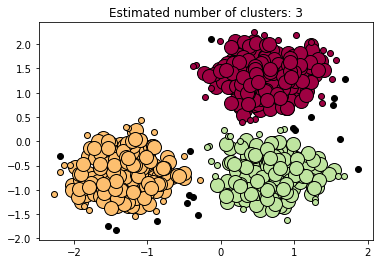

In [705]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()